# Описание проекта
Интернет-магазин продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
<br>
<br>
Нам поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Описание данных

1. `market_file.csv`
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
    - `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
    - `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
    - `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
2. `market_money.csv`
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    - `Выручка` — сумма выручки за период.
3. `market_time.csv`
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксировано общее время.
    - `минут` — значение времени, проведённого на сайте, в минутах.
4. `money.csv`
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Прибыль` — значение прибыли.


In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import shap
import warnings

from shap.plots import decision
from sklearn.impute import SimpleImputer
# Импорт для масштабирования и кодирования данных
from sklearn.preprocessing import (
    # Масштабирование числовых значений
    StandardScaler,
    RobustScaler,
    MinMaxScaler,

    # Кодирование категориальных значений
    OneHotEncoder,
    OrdinalEncoder,
)

# Импорт линейных моделей
from sklearn.linear_model import (
    LogisticRegression,
)

# Импорт метода опорных векторов
from sklearn.svm import SVC

# Импорт дерева решений
from sklearn.tree import DecisionTreeClassifier

# Импорт метода ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

# Импорт для подбора гиперпараметров модели и разбиения на выборки
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV
)

# Импорт для расчета метрик
from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
)

# Импорт для отбора признаков
from sklearn.feature_selection import (
    SelectKBest,
    mutual_info_classif,
)

# Импорт для создания пайплайнов
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

warnings.filterwarnings('ignore')
# pd.options.display.float_format = '{:,.1f}'.format

## Загрузка данных

Загрузим файлы и проверим, что данные в таблицах соответствуют описанию

In [2]:
try:
    market_file = pd.read_csv('Supervised_learning/data/market_file.csv')
    market_money = pd.read_csv('Supervised_learning/data/market_money.csv')
    market_time = pd.read_csv('Supervised_learning/data/market_time.csv')
    money = pd.read_csv('Supervised_learning/data/money.csv', sep=';', decimal=',')
except:
    market_file = pd.read_csv('/datasets/market_file.csv')
    market_money = pd.read_csv('/datasets/market_money.csv')
    market_time = pd.read_csv('/datasets/market_time.csv')
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [3]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [4]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [5]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [6]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


### Вывод:

Мы загрузили данные. Все столбцы приведены к правильному типу данных и соответствуют описанию

## Предобработка данных
Проведем необходимую предобработку данных.

In [7]:
# Переименовываем столбцы в таблице market_file
market_file = market_file.rename(columns={
    'id': 'id',
    'Покупательская активность': 'buyer_activity',
    'Тип сервиса': 'service_type',
    'Разрешить сообщать': 'allow_to_notify',
    'Маркет_актив_6_мес': 'activity_per_6_months',
    'Маркет_актив_тек_мес': 'activity_current_month',
    'Длительность': 'days_since_reg',
    'Акционные_покупки': 'discounted_purchases_ratio',
    'Популярная_категория': 'favorite_category',
    'Средний_просмотр_категорий_за_визит': 'avg_categories_per_visit',
    'Неоплаченные_продукты_штук_квартал': 'unpaid_products_per_quarter',
    'Ошибка_сервиса': 'service_error_count',
    'Страниц_за_визит': 'pages_per_visit',
})

# Переименовываем столбцы в таблице market_money
market_money = market_money.rename(columns={
    'id': 'id',
    'Период': 'revenue_period',
    'Выручка': 'revenue'
})

# Переименовываем столбцы в таблице market_time
market_time = market_time.rename(columns={
    'id': 'id',
    'Период': 'time_period',
    'минут': 'minutes_spent'
})

# Переименовываем столбцы в таблице money
money = money.rename(columns={
    'id': 'id',
    'Прибыль': 'profit'
})

# Проверяем, корректно ли переименовались столбцы
print(market_file.columns, '\n\n')
print(market_money.columns, '\n\n')
print(market_time.columns, '\n\n')
print(money.columns, '\n\n')


Index(['id', 'buyer_activity', 'service_type', 'allow_to_notify',
       'activity_per_6_months', 'activity_current_month', 'days_since_reg',
       'discounted_purchases_ratio', 'favorite_category',
       'avg_categories_per_visit', 'unpaid_products_per_quarter',
       'service_error_count', 'pages_per_visit'],
      dtype='object') 


Index(['id', 'revenue_period', 'revenue'], dtype='object') 


Index(['id', 'time_period', 'minutes_spent'], dtype='object') 


Index(['id', 'profit'], dtype='object') 




In [8]:
# Проверяем количество явных дубликатов
print('market_file duplicates:', market_file.duplicated().sum(), '\n\n')
print('market_money duplicates:', market_money.duplicated().sum(), '\n\n')
print('market_time duplicates:', market_time.duplicated().sum(), '\n\n')
print('money duplicates:', money.duplicated().sum(), '\n\n')

market_file duplicates: 0 


market_money duplicates: 0 


market_time duplicates: 0 


money duplicates: 0 




In [9]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1300 non-null   int64  
 1   buyer_activity               1300 non-null   object 
 2   service_type                 1300 non-null   object 
 3   allow_to_notify              1300 non-null   object 
 4   activity_per_6_months        1300 non-null   float64
 5   activity_current_month       1300 non-null   int64  
 6   days_since_reg               1300 non-null   int64  
 7   discounted_purchases_ratio   1300 non-null   float64
 8   favorite_category            1300 non-null   object 
 9   avg_categories_per_visit     1300 non-null   int64  
 10  unpaid_products_per_quarter  1300 non-null   int64  
 11  service_error_count          1300 non-null   int64  
 12  pages_per_visit              1300 non-null   int64  
dtypes: float64(2), int

In [10]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3900 non-null   int64  
 1   revenue_period  3900 non-null   object 
 2   revenue         3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [11]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2600 non-null   int64 
 1   time_period    2600 non-null   object
 2   minutes_spent  2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [12]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1300 non-null   int64  
 1   profit  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


С данными у нас все хорошо, там нет пропусков, все столбцы приведены к корректному типу данных. Осталось только проверить их на наличие неявных дубликатов

In [13]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1300 non-null   int64  
 1   buyer_activity               1300 non-null   object 
 2   service_type                 1300 non-null   object 
 3   allow_to_notify              1300 non-null   object 
 4   activity_per_6_months        1300 non-null   float64
 5   activity_current_month       1300 non-null   int64  
 6   days_since_reg               1300 non-null   int64  
 7   discounted_purchases_ratio   1300 non-null   float64
 8   favorite_category            1300 non-null   object 
 9   avg_categories_per_visit     1300 non-null   int64  
 10  unpaid_products_per_quarter  1300 non-null   int64  
 11  service_error_count          1300 non-null   int64  
 12  pages_per_visit              1300 non-null   int64  
dtypes: float64(2), int

In [14]:
# Смотрим уникальные значения категориальных столбцов
for col in market_file.select_dtypes(exclude='number').columns:
    print(col, ':', market_file[col].unique(), '\n\n')

buyer_activity : ['Снизилась' 'Прежний уровень'] 


service_type : ['премиум' 'стандартт' 'стандарт'] 


allow_to_notify : ['да' 'нет'] 


favorite_category : ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника'] 




В столбце `service_type` у нас содержатся 2 значения: "стандарт" и "стандартт". Исправим ошибку

In [15]:
# Исправляем ошибку
market_file.loc[market_file['service_type'] == 'стандартт', 'service_type'] = 'стандарт'

# Проверяем, исправили ли мы ошибку
market_file['service_type'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [16]:
market_money['revenue_period'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [17]:
market_time['time_period'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [18]:
# Исправляем опечатку
market_time.loc[market_time['time_period'] == 'предыдцщий_месяц', 'time_period'] = 'предыдущий_месяц'

# Проверяем, верно ли мы все исправили
market_time['time_period'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

### Вывод:

Мы преобразовали названия столбцов к более понятным и структурированным.
1. `market_file`
    - `id`  — номер покупателя в корпоративной базе данных.
    - `Покупательская активность` мы переименовали в `buyer_activity` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - `Тип сервиса` мы переименовали в `service_type` — уровень сервиса, например «премиум» и «стандарт».
    - `Разрешить сообщать` мы переименовали в `allow_to_notify` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - `Маркет_актив_6_мес` мы переименовали в `activity_per_6_months` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - `Маркет_актив_тек_мес` мы переименовали в `activity_current_month` — количество маркетинговых коммуникаций в текущем месяце.
    - `Длительность` мы переименовали в `days_since_reg` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - `Акционные_покупки` мы переименовали в `discounted_purchases_ratio` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - `Популярная_категория` мы переименовали в `favorite_category` — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - `Средний_просмотр_категорий_за_визит` мы переименовали в `avg_categories_per_visit` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - `Неоплаченные_продукты_штук_квартал` мы переименовали в `unpaid_products_per_quarter` — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - `Ошибка_сервиса` мы переименовали в `service_error_count` — число сбоев, которые коснулись покупателя во время посещения сайта.
    - `Страниц_за_визит` мы переименовали в `pages_per_visit` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
2. `market_money`
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` мы переименовали в `revenue_period` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    - `Выручка` мы переименовали в `revenue` — сумма выручки за период.
3. `market_time`
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` мы переименовали в `time_period` — название периода, во время которого зафиксировано общее время.
    - `минут` мы переименовали в `minutes_spent` — значение времени, проведённого на сайте, в минутах.
4. `money`
    - `id` — номер покупателя в корпоративной базе данных.
    - `Прибыль` мы переименовали в `profit` — значение прибыли.

<br>

Мы удалили неявный дубликат в столбце `service_type`

<br>

Мы исправили опечатку в столбце `time_period`

<br>

В таблице не было пропусков и явных дубликатов


 ## Исследовательский анализ данных

Проведем исследовательский анализ данных из каждой таблицы. Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. В описании данных сказано, что датафрейм `money` содержит в себе информацию со среднемесячной прибылью покупателя за последние 3 месяца, используем его для фильтрации. Если значение `profit` будет превышать 0, то человек совершил хотя бы одну покупку в течение этих трех месяцев


In [19]:
# Создаем условие
id_df = market_money.loc[market_money['revenue'] == 0, 'id'].unique()
len(id_df)

3

In [20]:
# Применяем фильтр
market_file = market_file.loc[~market_money['id'].isin(id_df), :]
market_time = market_time.loc[~market_money['id'].isin(id_df), :]
market_money = market_money.loc[~market_money['id'].isin(id_df), :]
money = money.loc[~money['id'].isin(id_df), :]

# Проверяем, сколько данных у нас осталось
print(market_file.info(), '\n\n')
print(market_time.info(), '\n\n')
print(market_money.info(), '\n\n')
print(money.info(), '\n\n')

<class 'pandas.core.frame.DataFrame'>
Index: 1291 entries, 3 to 1299
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1291 non-null   int64  
 1   buyer_activity               1291 non-null   object 
 2   service_type                 1291 non-null   object 
 3   allow_to_notify              1291 non-null   object 
 4   activity_per_6_months        1291 non-null   float64
 5   activity_current_month       1291 non-null   int64  
 6   days_since_reg               1291 non-null   int64  
 7   discounted_purchases_ratio   1291 non-null   float64
 8   favorite_category            1291 non-null   object 
 9   avg_categories_per_visit     1291 non-null   int64  
 10  unpaid_products_per_quarter  1291 non-null   int64  
 11  service_error_count          1291 non-null   int64  
 12  pages_per_visit              1291 non-null   int64  
dtypes: float64(2), int64(7)

Всего у нас было 3 покупателя, которые не совершил ни одной покупки в течение 3-х месяцев

### Анализ числовых значений

#### Анализ таблицы `market_file`

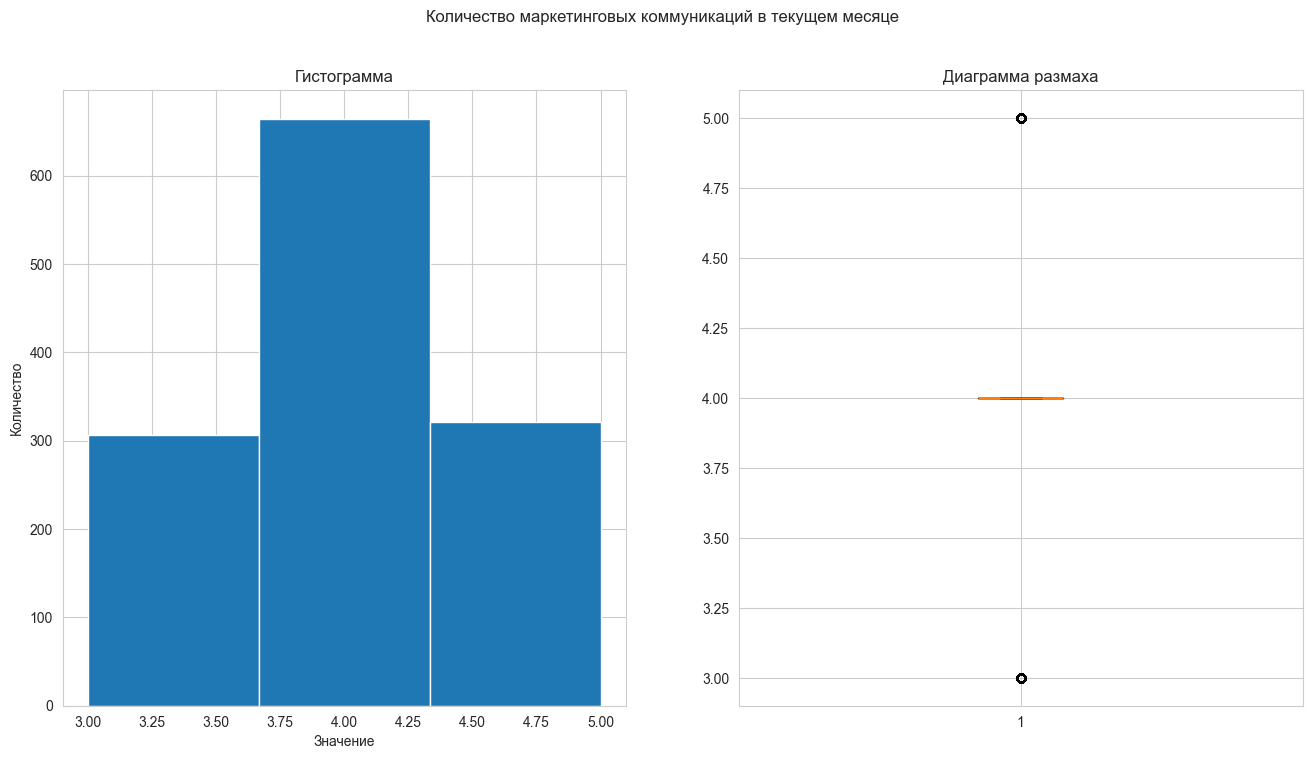

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(market_file['activity_current_month'], bins=3)
ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Количество')
ax[0].set_title('Гистограмма')

ax[1].boxplot(market_file['activity_current_month'])
ax[1].set_title('Диаграмма размаха')

plt.suptitle('Количество маркетинговых коммуникаций в текущем месяце')
plt.show()

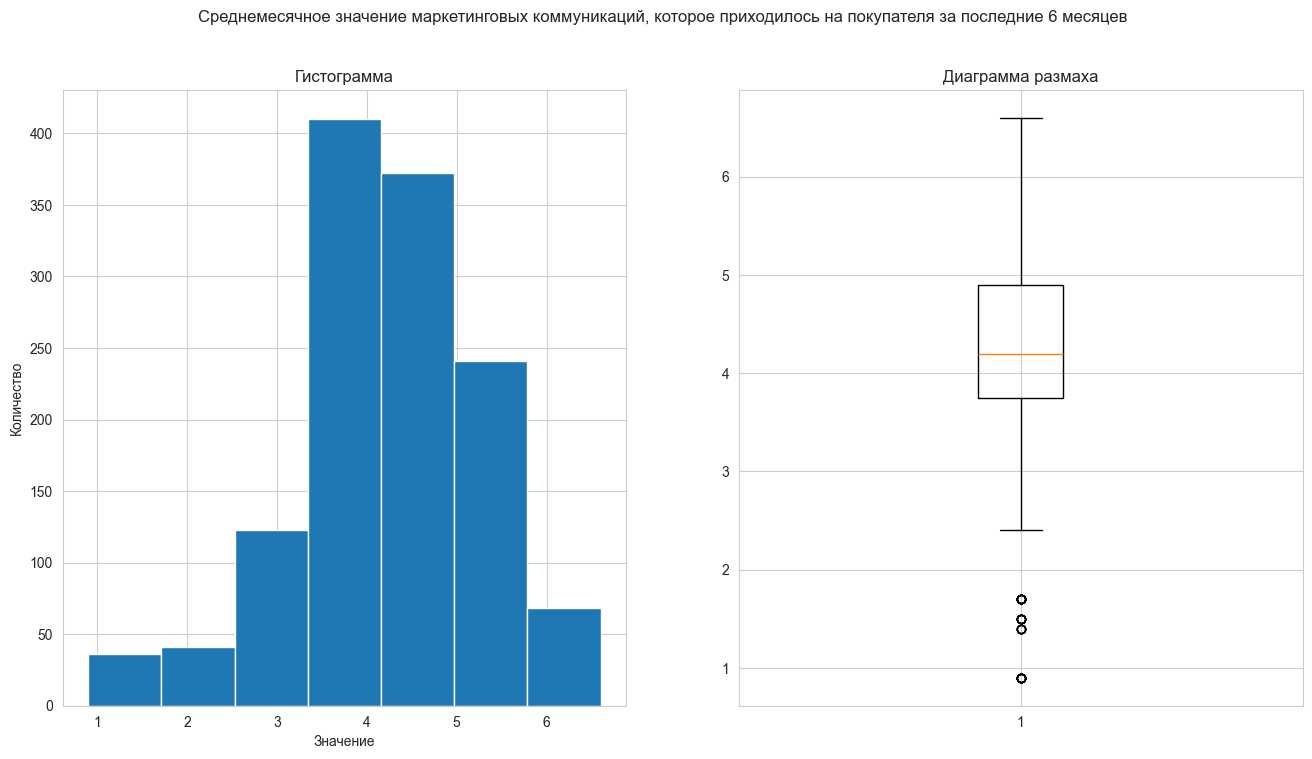

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(market_file['activity_per_6_months'], bins=7)
ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Количество')
ax[0].set_title('Гистограмма')

ax[1].boxplot(market_file['activity_per_6_months'])
ax[1].set_title('Диаграмма размаха')

plt.suptitle(
    'Cреднемесячное значение маркетинговых коммуникаций, которое приходилось на покупателя за последние 6 месяцев')
plt.show()

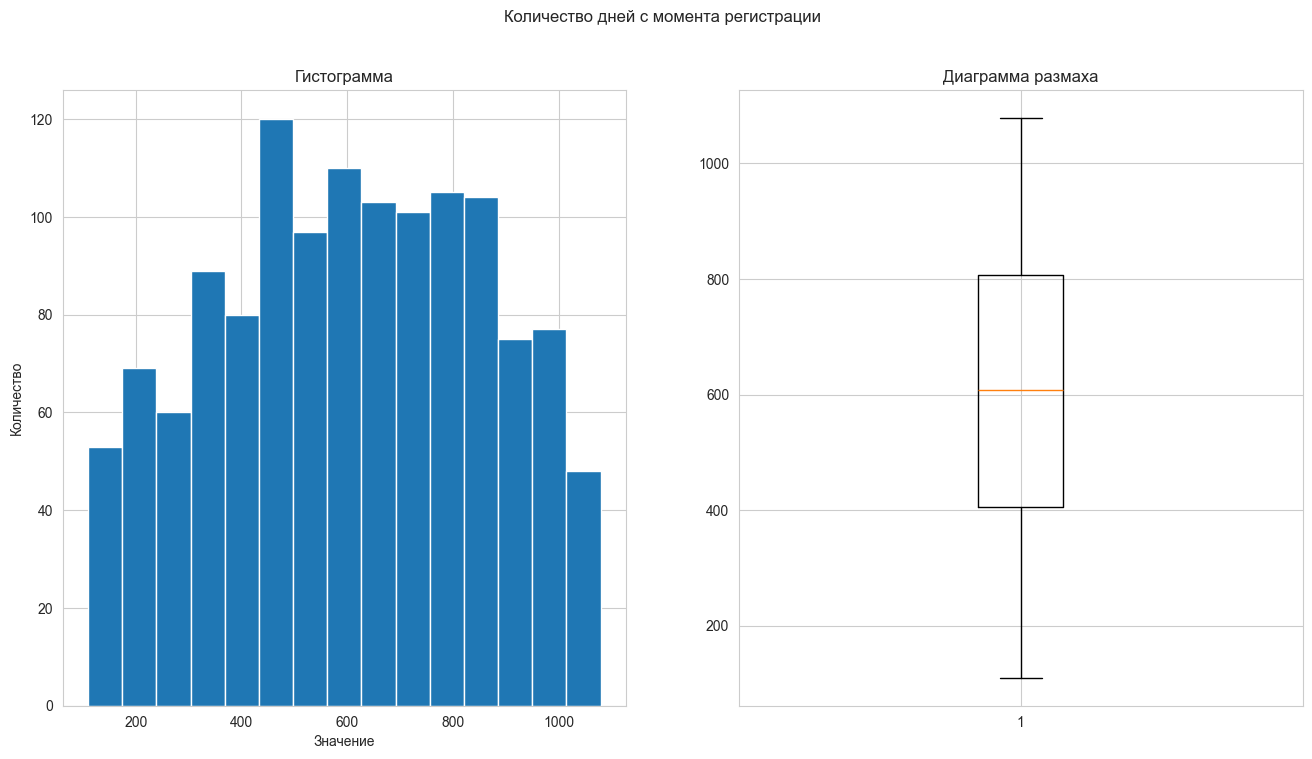

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(market_file['days_since_reg'], bins=15)
ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Количество')
ax[0].set_title('Гистограмма')

ax[1].boxplot(market_file['days_since_reg'])
ax[1].set_title('Диаграмма размаха')

plt.suptitle('Количество дней с момента регистрации')
plt.show()

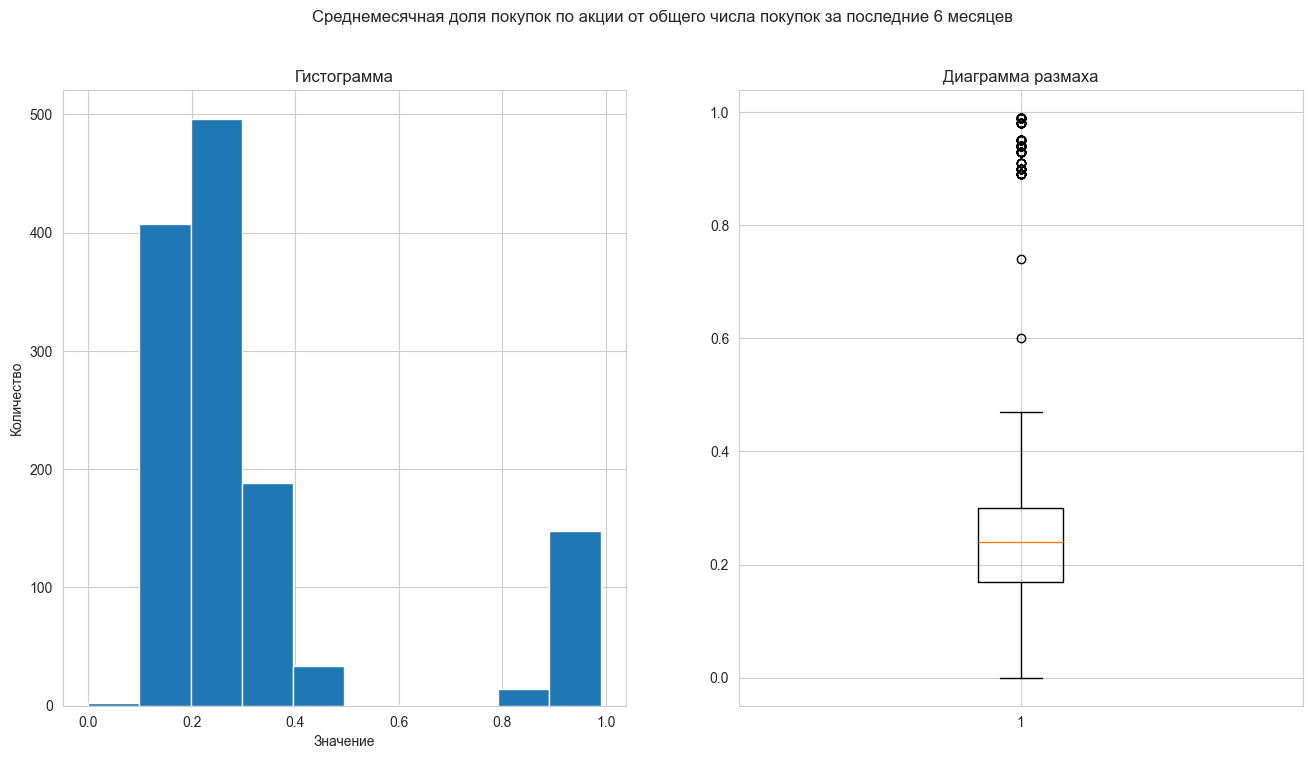

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(market_file['discounted_purchases_ratio'], bins=10)
ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Количество')
ax[0].set_title('Гистограмма')

ax[1].boxplot(market_file['discounted_purchases_ratio'])
ax[1].set_title('Диаграмма размаха')

plt.suptitle('Cреднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев')
plt.show()

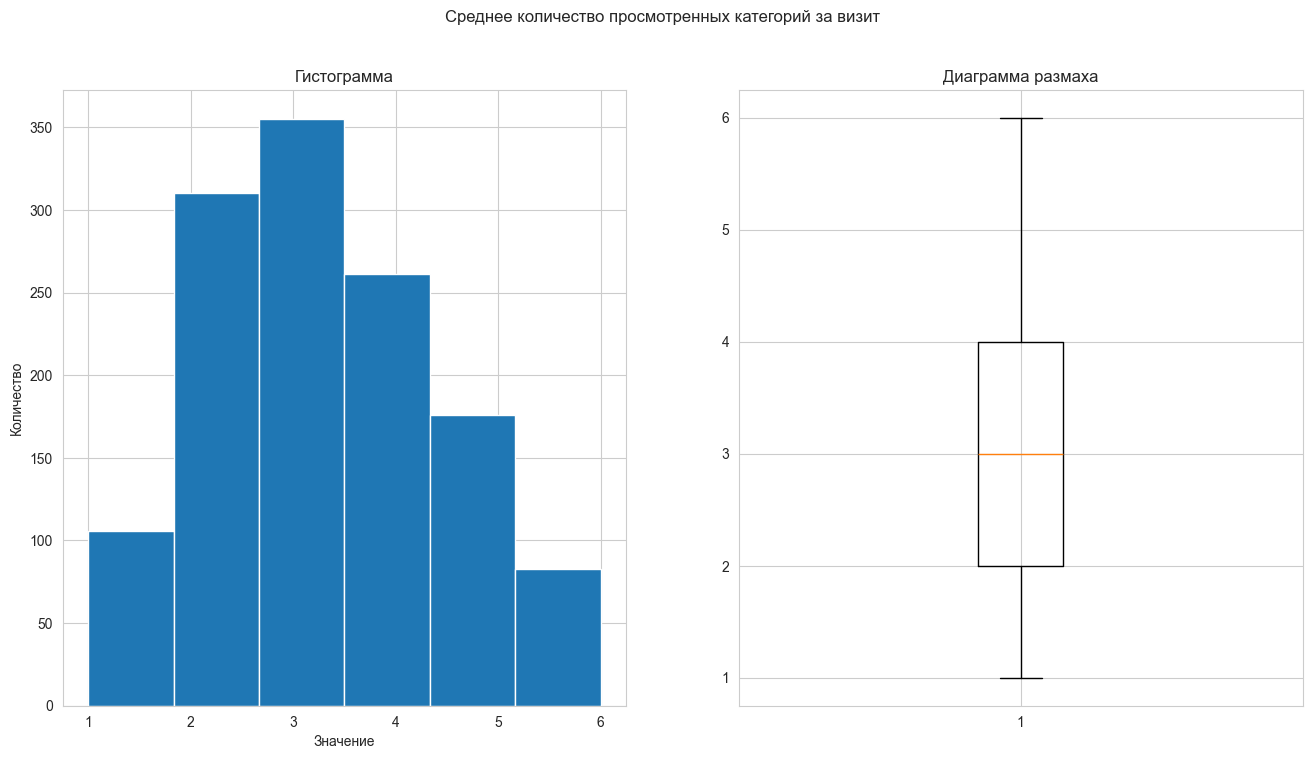

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(market_file['avg_categories_per_visit'], bins=6)
ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Количество')
ax[0].set_title('Гистограмма')

ax[1].boxplot(market_file['avg_categories_per_visit'])
ax[1].set_title('Диаграмма размаха')

plt.suptitle('Среднее количество просмотренных категорий за визит')
plt.show()

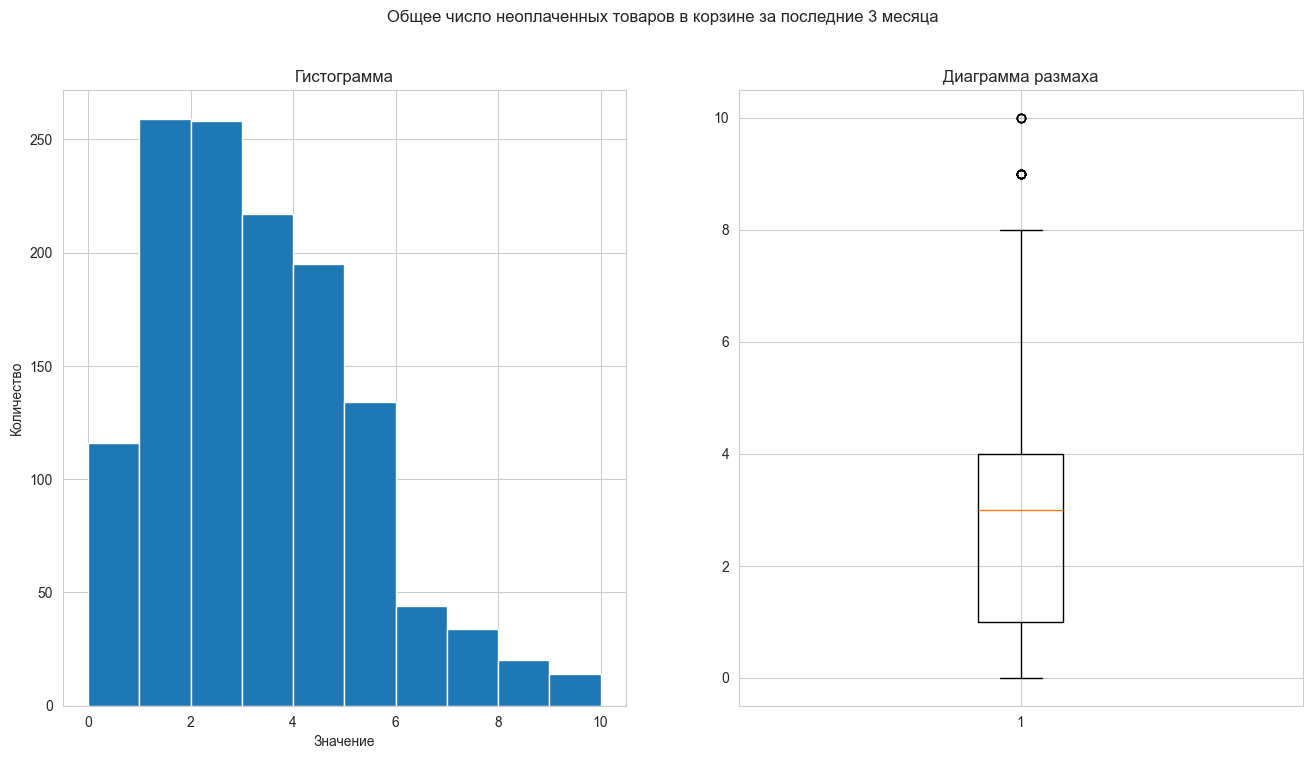

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(market_file['unpaid_products_per_quarter'], bins=10)
ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Количество')
ax[0].set_title('Гистограмма')

ax[1].boxplot(market_file['unpaid_products_per_quarter'])
ax[1].set_title('Диаграмма размаха')

plt.suptitle('Общее число неоплаченных товаров в корзине за последние 3 месяца')
plt.show()

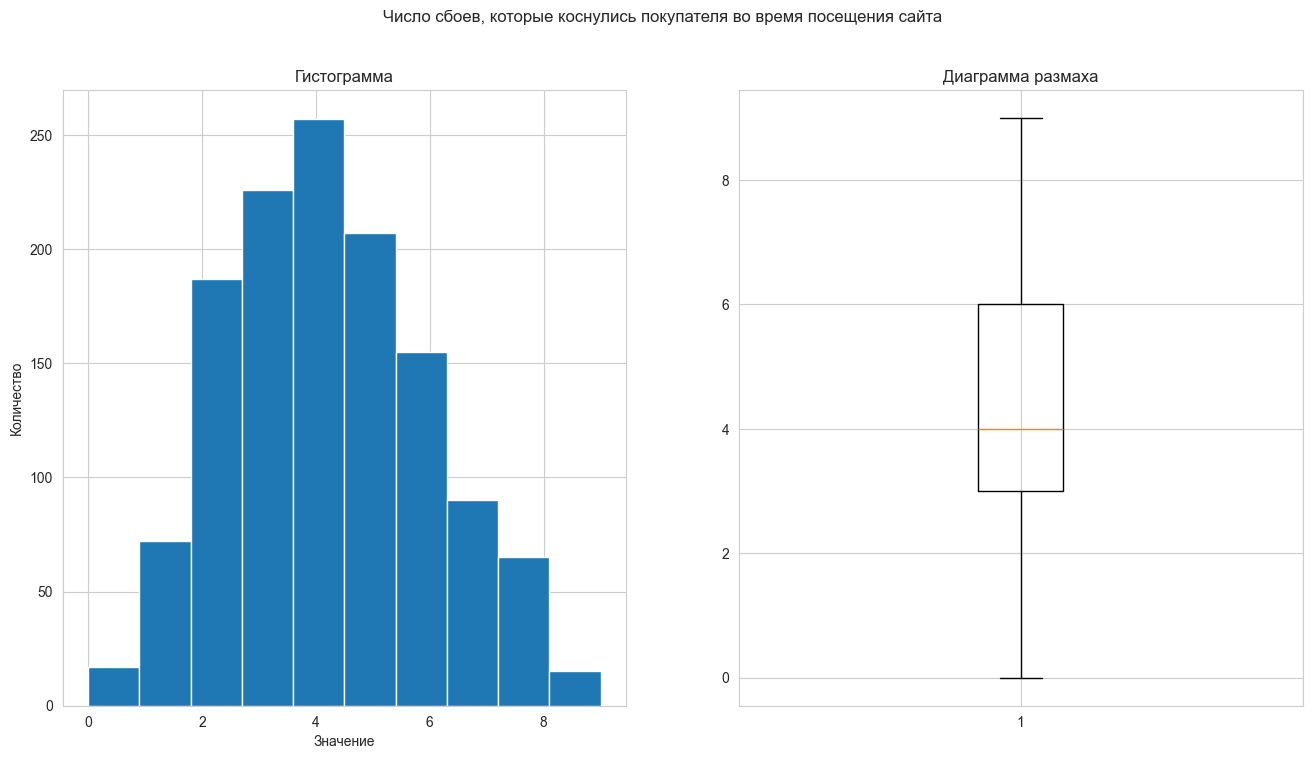

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(market_file['service_error_count'], bins=10)
ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Количество')
ax[0].set_title('Гистограмма')

ax[1].boxplot(market_file['service_error_count'])
ax[1].set_title('Диаграмма размаха')

plt.suptitle('Число сбоев, которые коснулись покупателя во время посещения сайта')
plt.show()

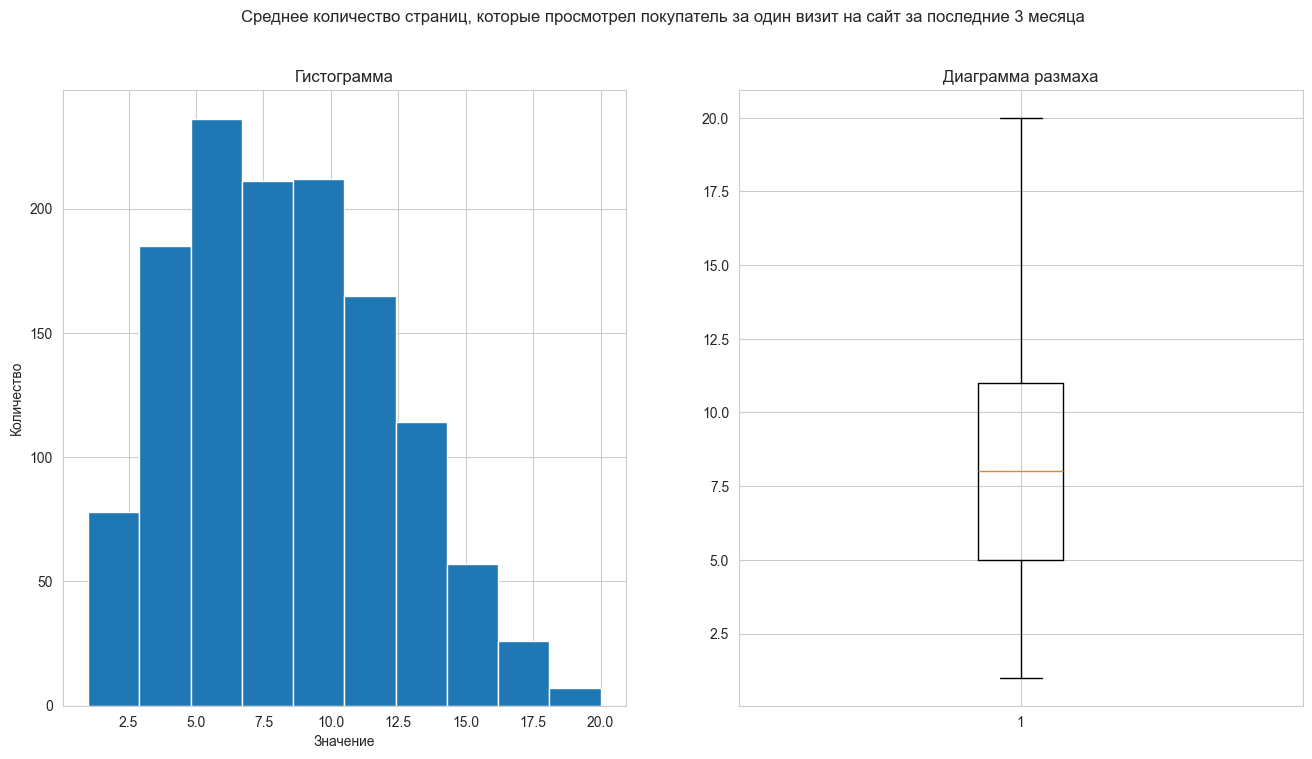

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(market_file['pages_per_visit'], bins=10)
ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Количество')
ax[0].set_title('Гистограмма')

ax[1].boxplot(market_file['pages_per_visit'])
ax[1].set_title('Диаграмма размаха')

plt.suptitle('Cреднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца')
plt.show()

#### Анализ таблицы `market_money`

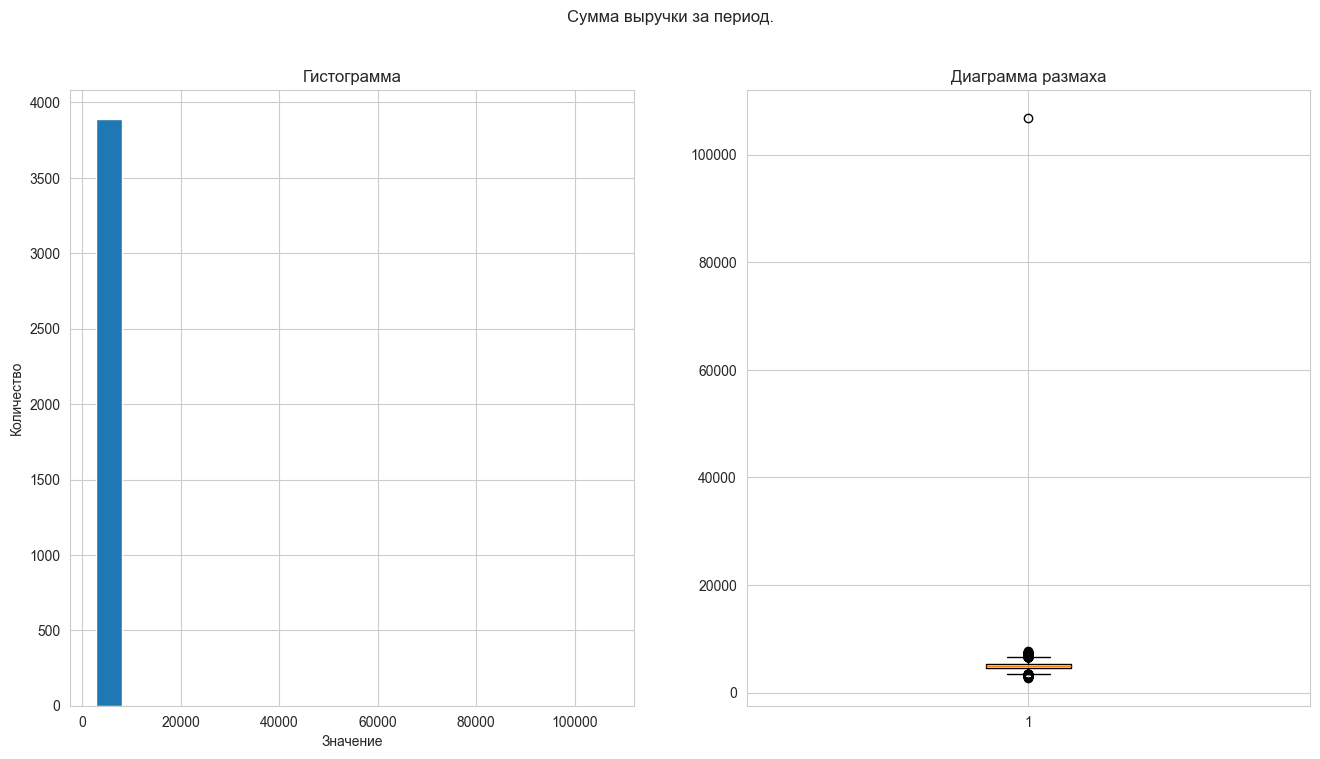

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(market_money['revenue'], bins=20)
ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Количество')
ax[0].set_title('Гистограмма')

ax[1].boxplot(market_money['revenue'])
ax[1].set_title('Диаграмма размаха')

plt.suptitle('Cумма выручки за период.')
plt.show()

Мы видим, что у нас присутствует 2 выброса, которые вызваны какой-то ошибкой, удалим их

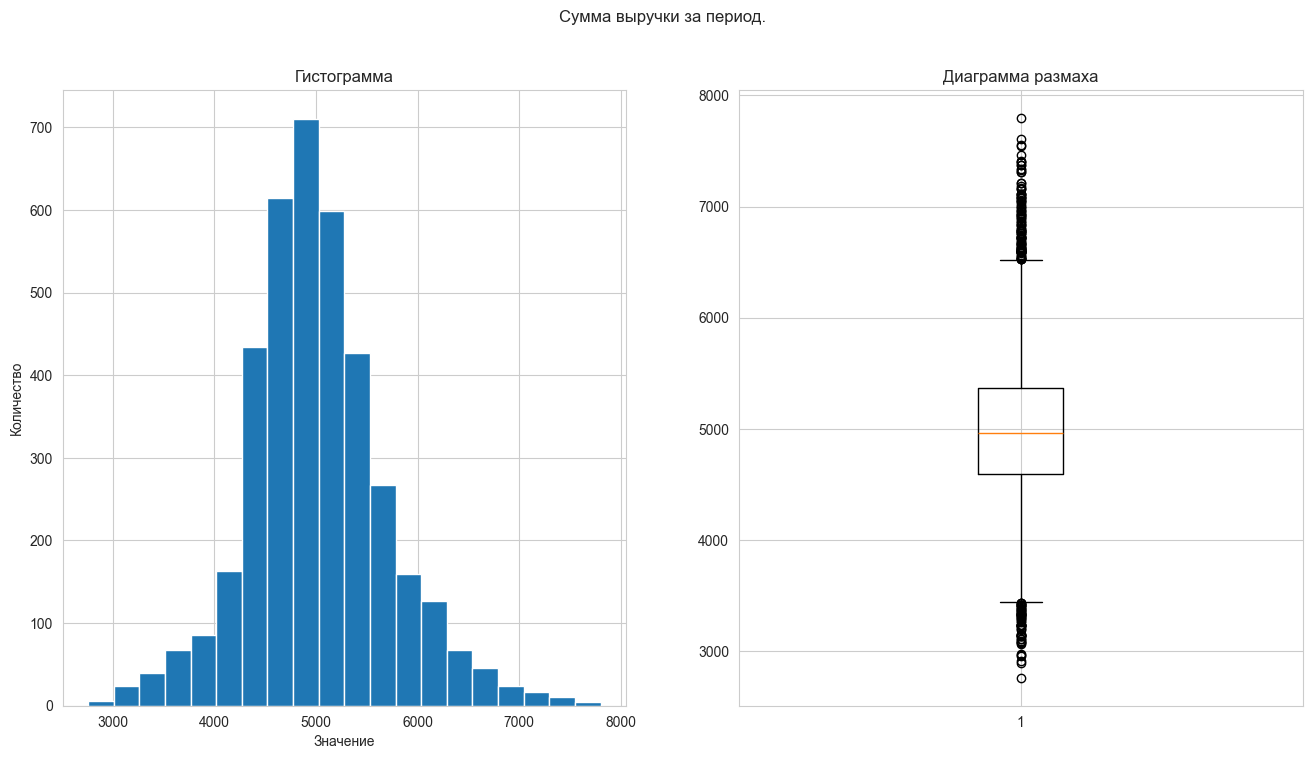

In [30]:
market_money = market_money.drop(
    market_money[market_money['revenue'] == market_money['revenue'].max()].index,
    axis=0
)
# market_money = market_money.drop(
#     market_money[market_money['revenue'] == market_money['revenue'].min()].index,
#     axis=0
# )

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(market_money['revenue'], bins=20)
ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Количество')
ax[0].set_title('Гистограмма')

ax[1].boxplot(market_money['revenue'])
ax[1].set_title('Диаграмма размаха')

plt.suptitle('Cумма выручки за период.')
plt.show()

#### Анализ таблицы `market_time`

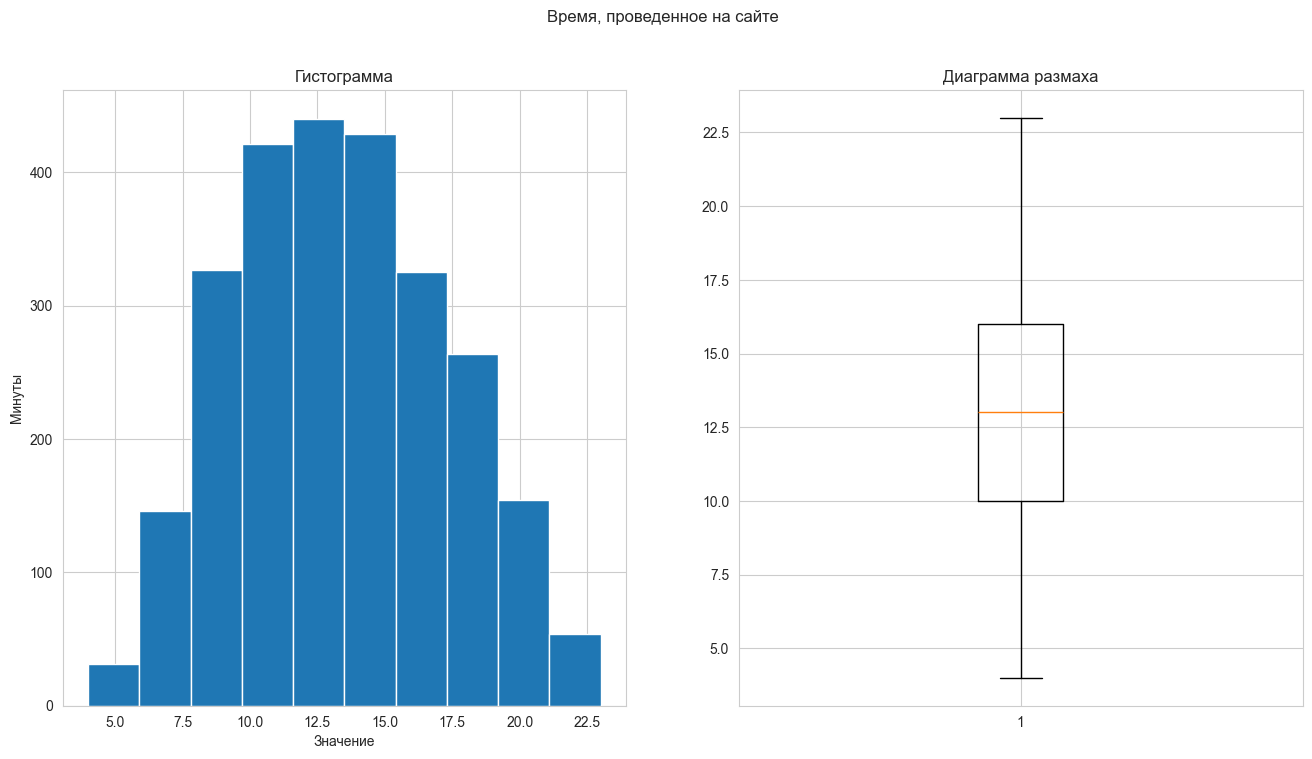

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(market_time['minutes_spent'], bins=10)
ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Минуты')
ax[0].set_title('Гистограмма')

ax[1].boxplot(market_time['minutes_spent'])
ax[1].set_title('Диаграмма размаха')

plt.suptitle('Время, проведенное на сайте')
plt.show()

#### Анализ таблицы `money`

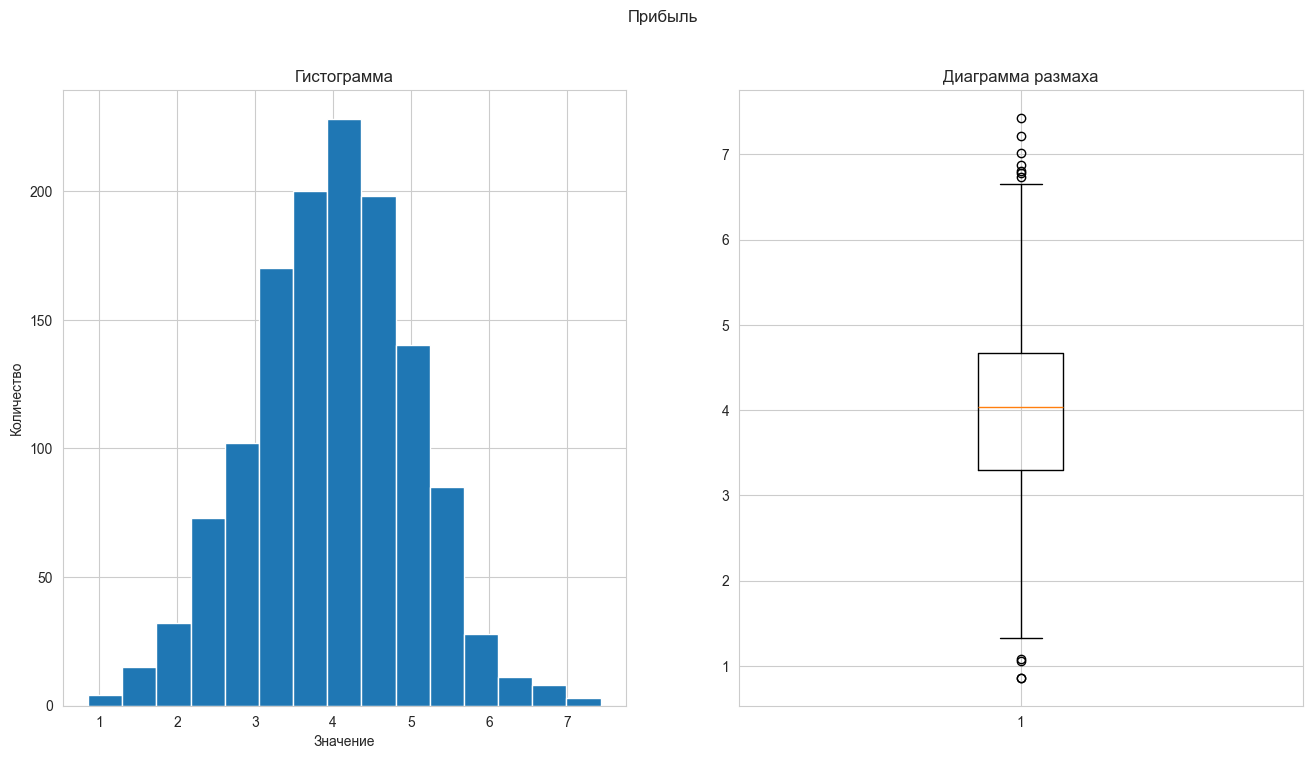

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(money['profit'], bins=15)
ax[0].set_xlabel('Значение')
ax[0].set_ylabel('Количество')
ax[0].set_title('Гистограмма')

ax[1].boxplot(money['profit'])
ax[1].set_title('Диаграмма размаха')

plt.suptitle('Прибыль')
plt.show()

#### Промежуточный вывод:

У нас есть несколько столбцов, распределение которых похоже на нормальное:
    - `service_error_count`
    - `revenue`
    - `time_spent`
    - `profit`

В столбце `revenue` мы удалили 1 выброс, которые были вызваны какой-то ошибкой. <br>
Все остальные выбросы мы оставили, чтобы модель училась не в "идеальных" условиях, тем более, выбросы выглядят правдоподобно

### Анализ категориальных значений

#### Анализ таблицы `market_file`

In [33]:
market_file.head(1)

,id,buyer_activity,service_type,allow_to_notify,activity_per_6_months,activity_current_month,days_since_reg,discounted_purchases_ratio,favorite_category,avg_categories_per_visit,unpaid_products_per_quarter,service_error_count,pages_per_visit
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4


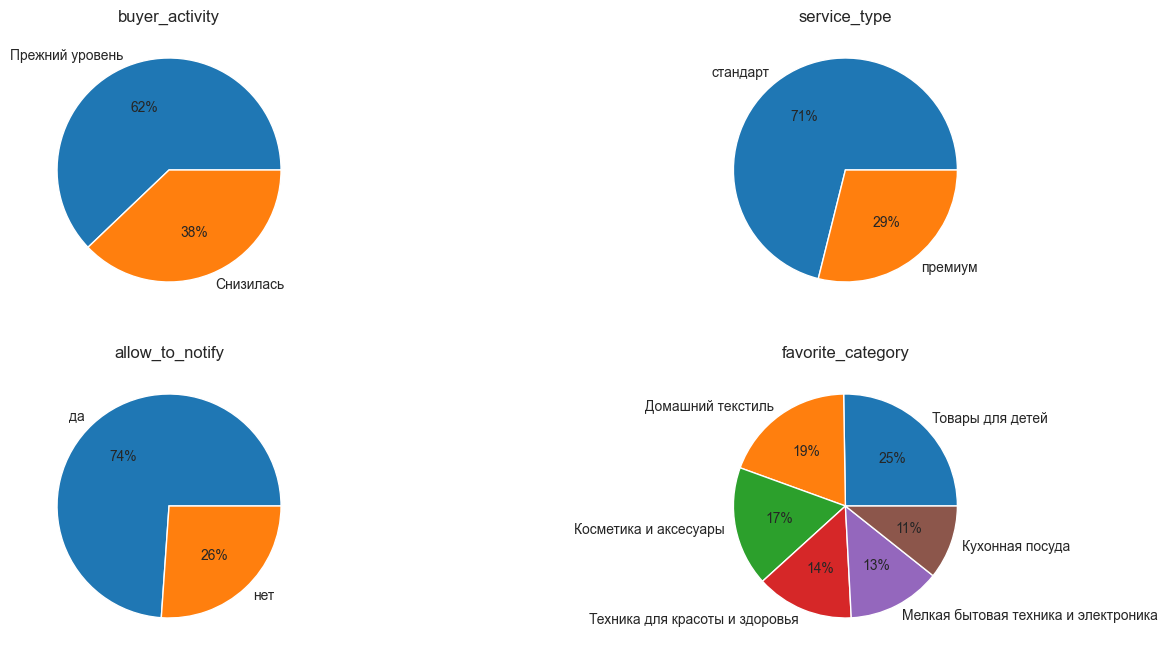

In [34]:
cat_col_names = market_file.select_dtypes(exclude='number').columns.tolist()
plt.figure(figsize=(16, 8))

for i in range(len(cat_col_names)):
    plt.subplot(2, 2, i + 1)
    plt.pie(
        market_file[cat_col_names[i]].value_counts(),
        labels=market_file[cat_col_names[i]].value_counts().index,
        autopct='%1.0f%%',
    )
    plt.gca().set_title(cat_col_names[i])

plt.show()

Мы можем видеть, что в целевом признаке прежний уровень покупательской активности преобладает. Так же у 71% пользователей не подключен сервис премиум. 74% пользователей согласились на рассылку. Категории распределены более-менее равномерно, слегка преобладают товары для детей. Иными словами, дисбаланс классов присутствует в 3-х из 4-х категориальных столбцов. Во время разделения данных на выборки, нам надо будет использовать стратификацию. Посмотрим внимательнее, как распределены

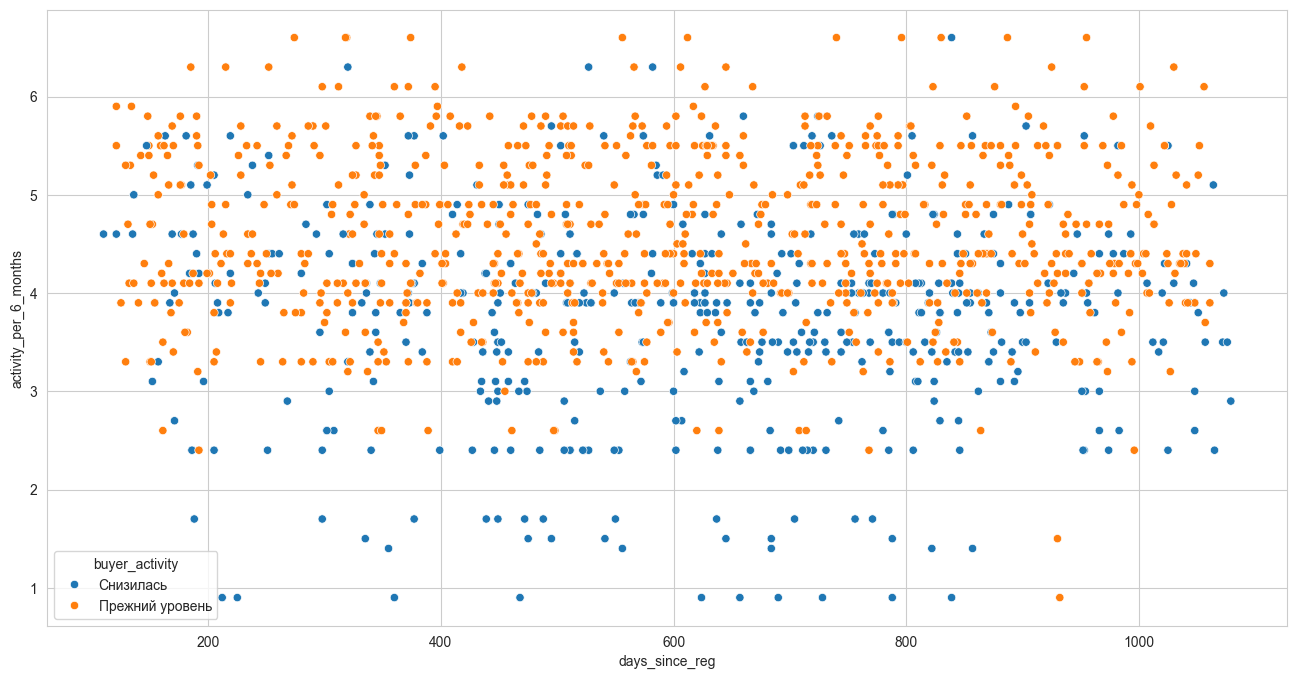

In [35]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(
    data=market_file,
    x='days_since_reg',
    y='activity_per_6_months',
    hue='buyer_activity',
    ax=ax
)

plt.show()

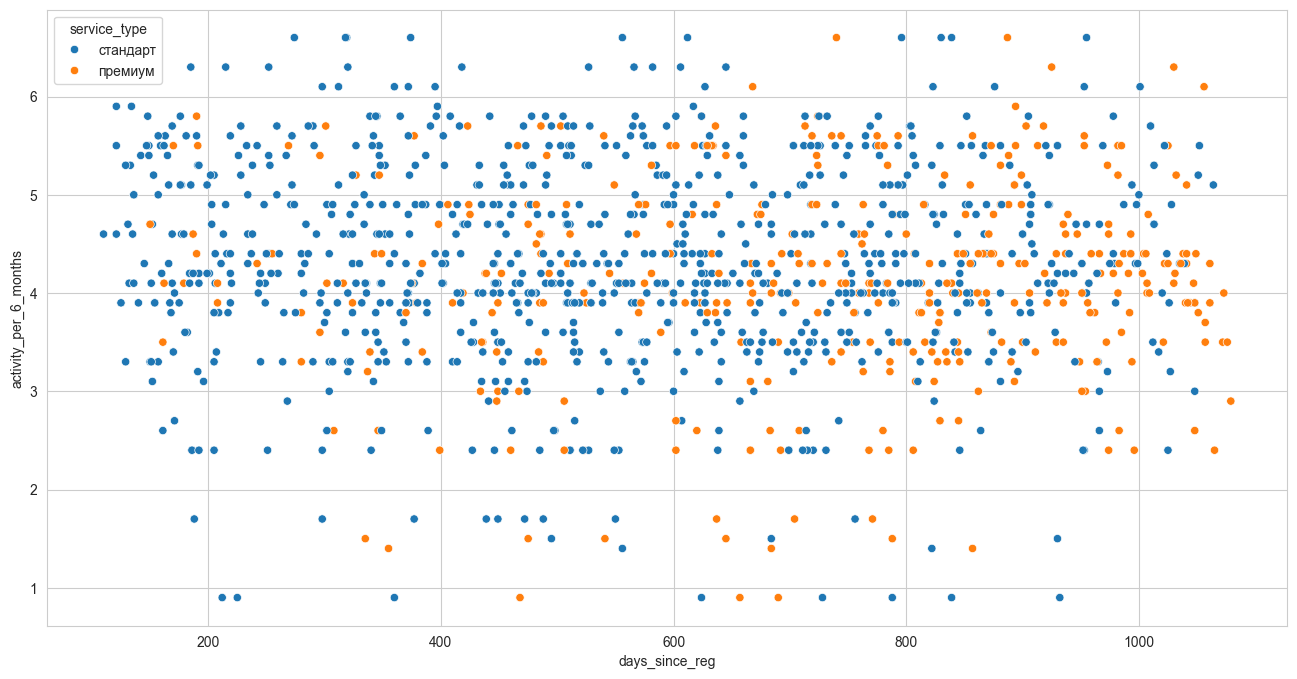

In [36]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(
    data=market_file,
    x='days_since_reg',
    y='activity_per_6_months',
    hue='service_type',
    ax=ax
)

plt.show()

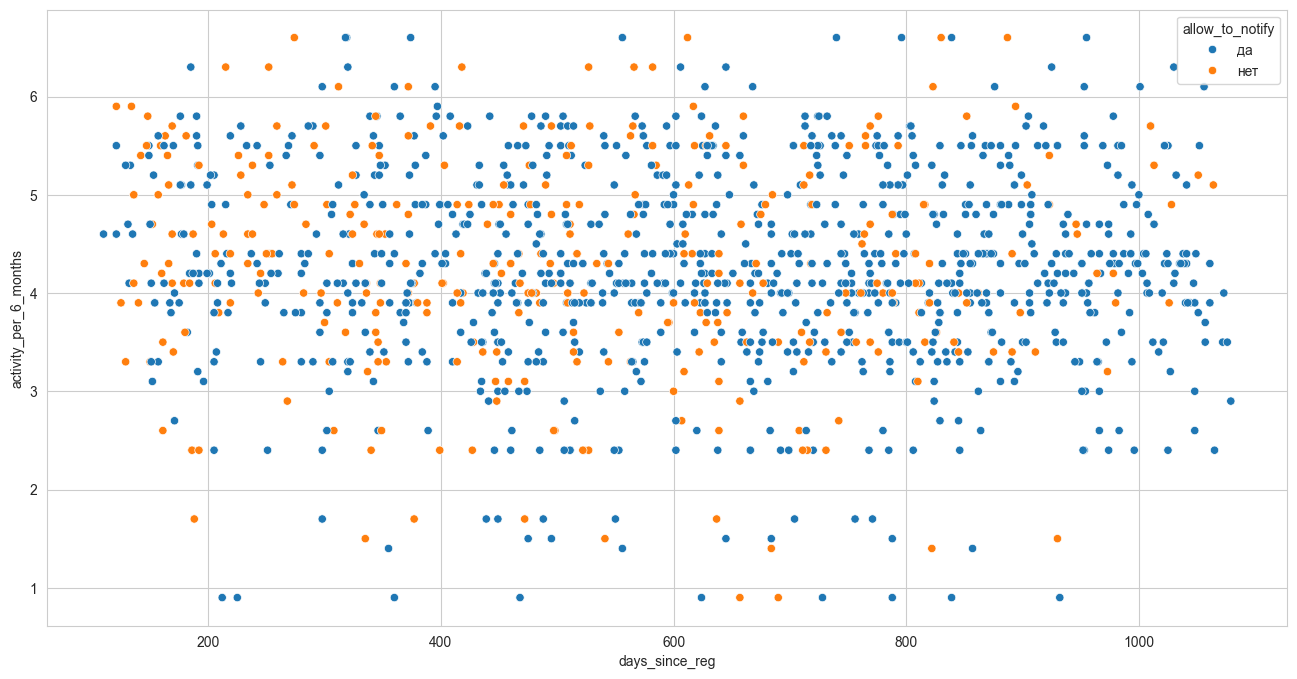

In [37]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(
    data=market_file,
    x='days_since_reg',
    y='activity_per_6_months',
    hue='allow_to_notify',
    ax=ax
)

plt.show()

Пусть у нас и присутствует дисбаланс классов, но данные распределены равномерно, посмотрим потом на то, как это будет влиять на корреляцию с таргетом

#### Анализ таблицы `market_money`

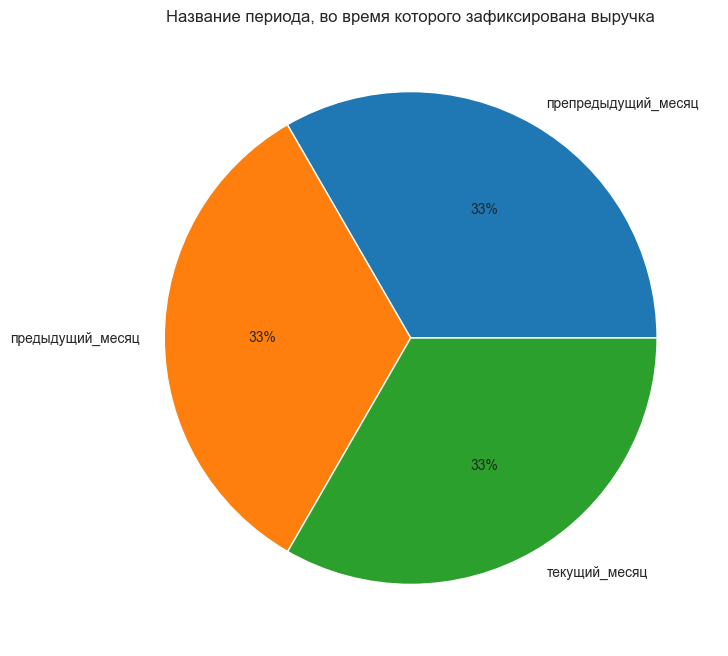

In [38]:
plt.figure(figsize=(8, 8))
plt.pie(
    market_money['revenue_period'].value_counts(),
    labels=market_money['revenue_period'].value_counts().index,
    autopct='%1.0f%%',
)
plt.gca().set_title('Название периода, во время которого зафиксирована выручка')
plt.show()

#### Анализ таблицы `market_time`

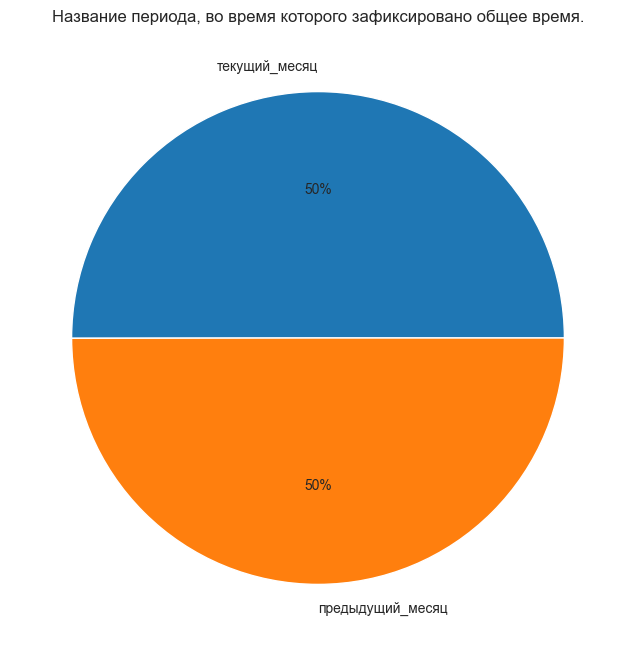

In [39]:
plt.figure(figsize=(8, 8))
plt.pie(
    market_time['time_period'].value_counts(),
    labels=market_time['time_period'].value_counts().index,
    autopct='%1.0f%%',
)
plt.gca().set_title('Название периода, во время которого зафиксировано общее время.')
plt.show()

#### Промежуточный вывод:

В таблице `market_file` в 3 из 4-х категориальных столбцов мы видим дисбаланс классов, нам надо будет использовать стратификацию при разделении данных на выборки. Однако при дисбалансе классов данные распределены равномерно

### Вывод:

В следующих столбцах, распределение которых похоже на нормальное:
    - `service_error_count`
    - `revenue`
    - `time_spent`
    - `profit`

В столбце `revenue` мы удалили 2 выброса, которые были вызваны какой-то ошибкой. <br>
Все остальные выбросы мы оставили, чтобы модель училась не в "идеальных" условиях, тем более, выбросы выглядят правдоподобно.

В таблице `market_file` в 3 из 4-х категориальных столбцов присутствует дисбаланс классов




## Объединение таблиц

1. Объединим таблицы `market_file.csv`, `market_money.csv`, `market_time.csv`. Данные о прибыли из файла `money.csv` при моделировании нам не понадобятся.
2. Будем учитывать, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов

In [40]:
# Создаем сводную таблицу для market_money
market_money_pivot_table = market_money.pivot_table(index='id', columns='revenue_period', values='revenue',
                                                    aggfunc='first').reset_index()
market_money_pivot_table.columns.name = None  # Убираем имя столбца
market_money_pivot_table = market_money_pivot_table.rename(columns={
    'id': 'id',
    'текущий_месяц': 'current_month_revenue',
    'предыдущий_месяц': 'previous_month_revenue',
    'препредыдущий_месяц': 'preprevious_month_revenue',
})
market_money_pivot_table.head()

,id,previous_month_revenue,preprevious_month_revenue,current_month_revenue
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


In [41]:
# Создаем сводную таблицу для market_time
market_time_pivot_table = market_time.pivot_table(index='id', columns='time_period', values='minutes_spent',
                                                  aggfunc='first').reset_index()
market_time_pivot_table.columns.name = None  # Убираем имя столбца
market_time_pivot_table = market_time_pivot_table.rename(columns={
    'id': 'id',
    'текущий_месяц': 'current_month_minutes',
    'предыдущий_месяц': 'previous_month_minutes',
})
market_time_pivot_table.head()

,id,previous_month_minutes,current_month_minutes
0,215349,12.0,NaN
1,215350,8.0,13.0
2,215351,11.0,13.0
3,215352,8.0,11.0
4,215353,10.0,10.0


In [42]:
# Создаем финальную таблицу, содержащую все данные
df = (market_file.merge(market_time_pivot_table, on='id', how='inner')
      .merge(market_money_pivot_table, on='id', how='inner'))
df = df.set_index('id')

# Проверяем размер
print(df.shape)

df.head()

(1287, 17)


,buyer_activity,service_type,allow_to_notify,activity_per_6_months,activity_current_month,days_since_reg,discounted_purchases_ratio,favorite_category,avg_categories_per_visit,unpaid_products_per_quarter,service_error_count,pages_per_visit,previous_month_minutes,current_month_minutes,previous_month_revenue,preprevious_month_revenue,current_month_revenue
id,,,,,,,,,,,,,,,,,
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11.0,13.0,6158.0,4793.0,6610.4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8.0,11.0,5807.5,4594.0,5872.5
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10.0,10.0,4738.5,5124.0,5388.5
215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,11.0,12.0,5685.0,4503.0,5869.6
215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,12.0,10.0,3263.0,4749.0,3772.6


In [43]:
# Удаляем пропуски, которые могли образоваться во время соедениния таблиц
df = df.dropna()

# Проверяем размер
print(df.shape)

df.isna().sum()

(1284, 17)


buyer_activity                 0
service_type                   0
allow_to_notify                0
activity_per_6_months          0
activity_current_month         0
days_since_reg                 0
discounted_purchases_ratio     0
favorite_category              0
avg_categories_per_visit       0
unpaid_products_per_quarter    0
service_error_count            0
pages_per_visit                0
previous_month_minutes         0
current_month_minutes          0
previous_month_revenue         0
preprevious_month_revenue      0
current_month_revenue          0
dtype: int64

### Анализ по подвыборкам

Разделим таблицу на 2 выборки, используя для этого целевой признак

In [44]:
# Разделяем на подвыборки
target_reduced = df[df['buyer_activity'] == 'Снизилась']
target_remained = df[df['buyer_activity'] != 'Снизилась']

# Смотрим размер выборок
print(target_reduced.shape[0])
print(target_remained.shape[0])

482
802


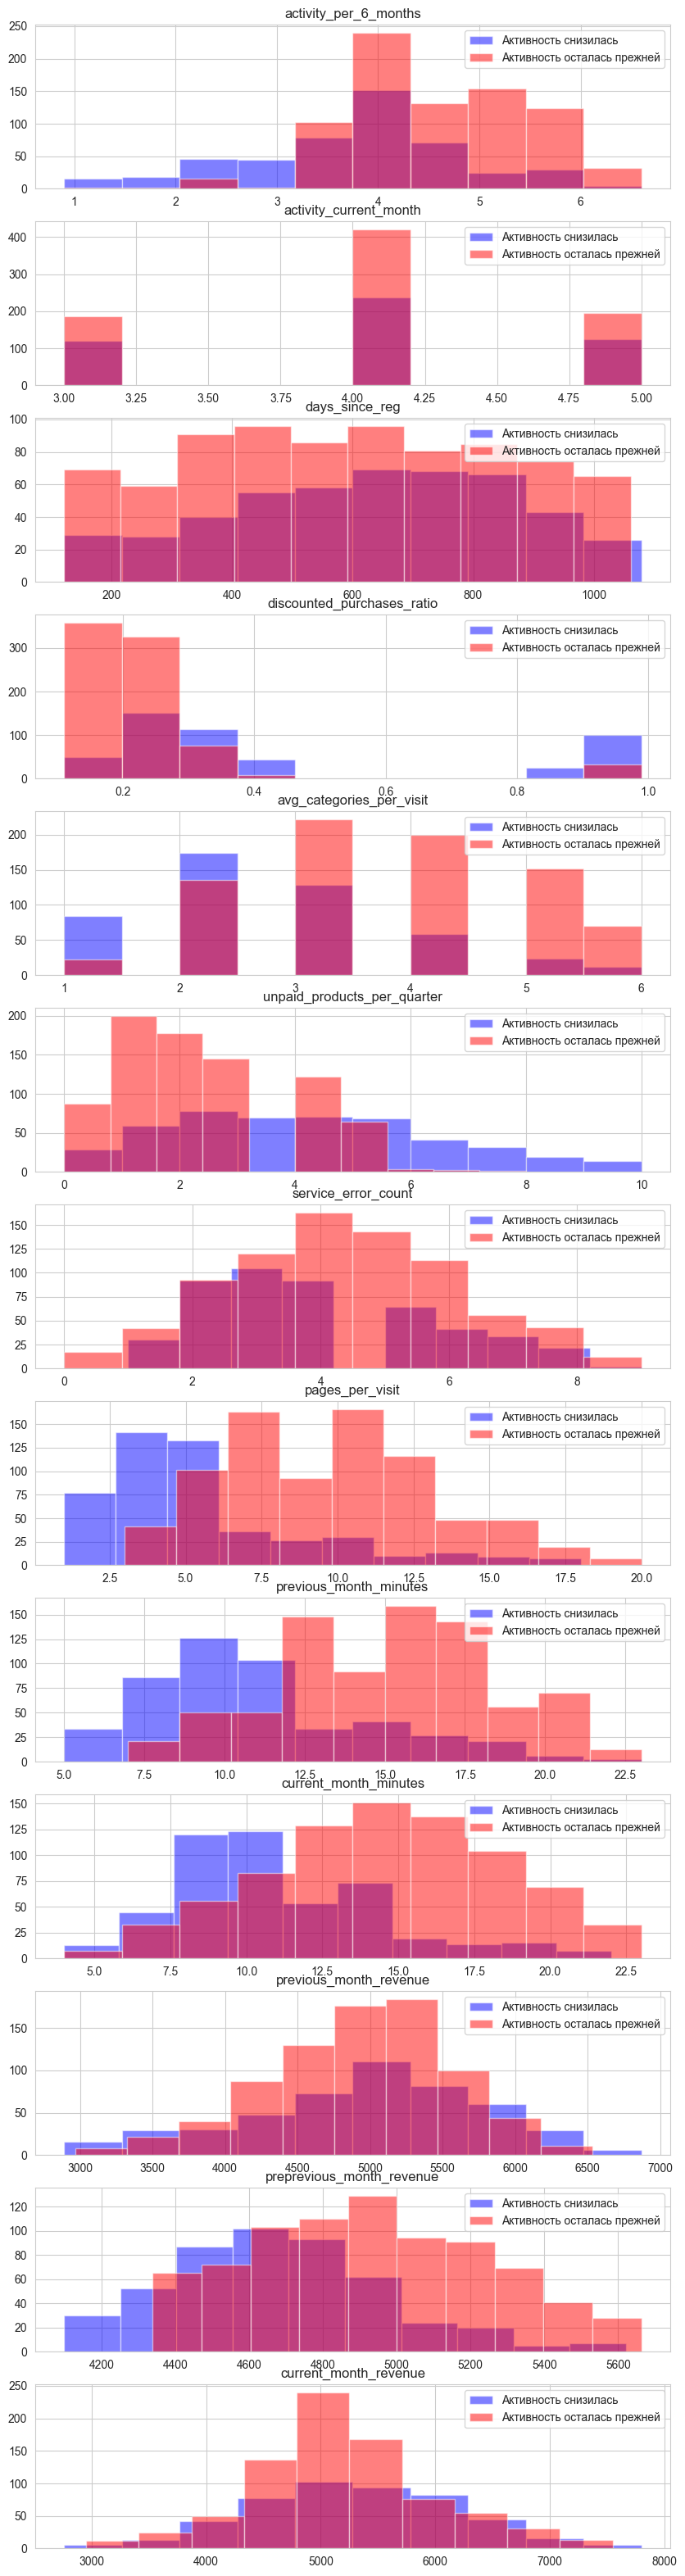

In [45]:
num_col_names = df.select_dtypes(include='number').columns.to_list()

fig, ax = plt.subplots(nrows=len(num_col_names),
                       ncols=1, figsize=(10, 40))

for i in range(len(df.select_dtypes(include='number').columns.to_list())):
    ax[i].hist(target_reduced[num_col_names[i]],
               # bins=201,
               color='blue', alpha=0.5,
               label='Активность снизилась')

    ax[i].hist(target_remained[num_col_names[i]],
               # bins=20,20
               color='red', alpha=0.5,
               label='Активность осталась прежней')
    ax[i].set_title(num_col_names[i])
    ax[i].legend()

# plt.legend(['Активность снизилась', 'Активность осталась прежней'])
plt.show()


- Пользователи, чья активность снизилась в целом имели меньшую частоту действий за 6 месяцев и текущий месяц.
- Пользователи со сниженной активностью демонстрируют меньшую вовлеченность в последние месяцы, основываясь на гистограммах с количеством проведенных минут и просмотренных страниц.
- Отношение скидочных покупок выше у пользователей, чья активность снизилась, что может говорить о большей зависимости от акций.
- Среднее число категорий за визит также ниже у пользователей с пониженной активностью, что может свидетельствовать о том, что они заходят за каким-то конкретным товаром
- Пользователи с меньшей активностью сталкивались с большим числом ошибок в сервисе, что может быть одним из факторов снижения их вовлеченности.
- Мы видим, что несмотря на снижение активности, пользователи со сниженной активностью относительно схожий уровень доходов в предыдущем и текущем месяце, хотя распределение немного смещено к меньшим значениям.

Для того чтобы повысить заинтересованность группы с пониженной активностью, нужно стимулировать их просматривать больше страниц.

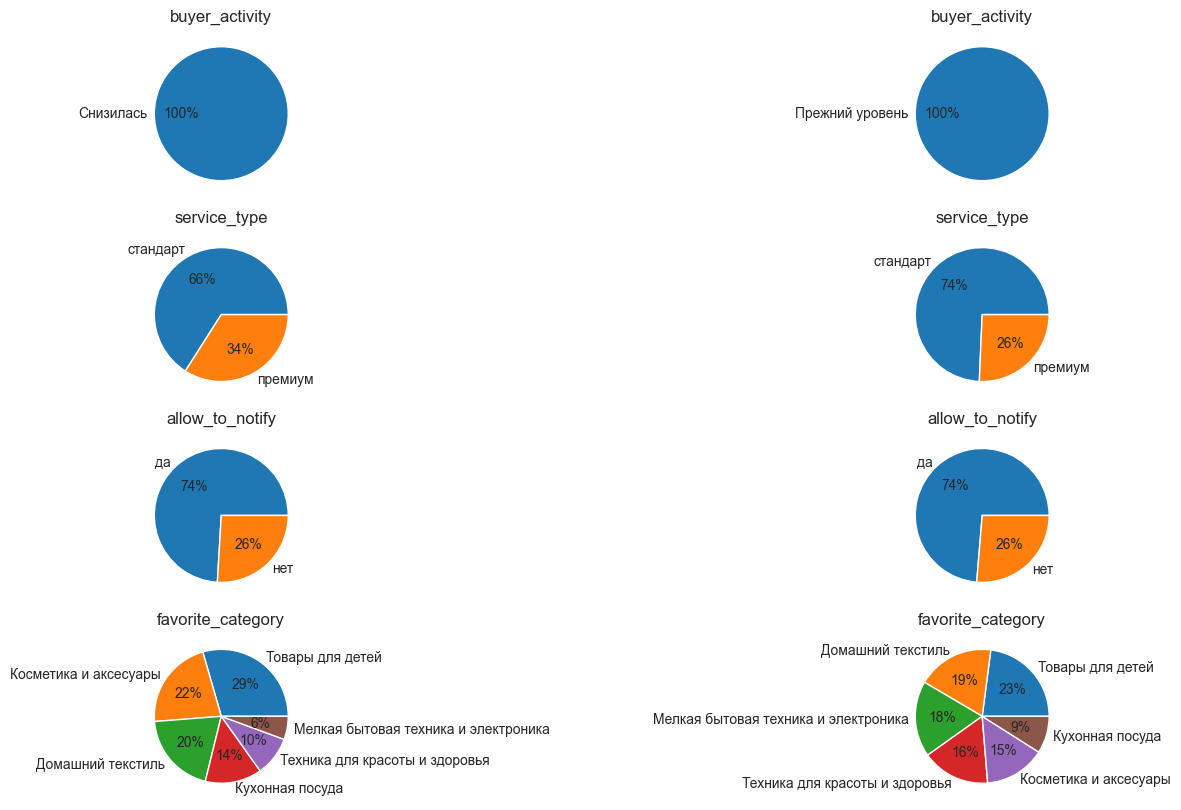

In [46]:
cat_col_names = df.select_dtypes(exclude='number').columns.tolist()

fig, ax = plt.subplots(nrows=len(cat_col_names), ncols=2, figsize=(18, 10))

for i in range(len(cat_col_names)):
    ax[i, 0].pie(
        target_reduced[cat_col_names[i]].value_counts(),
        labels=target_reduced[cat_col_names[i]].value_counts().index,
        autopct='%1.0f%%',
    )
    ax[i, 0].set_title(cat_col_names[i])

    ax[i, 1].pie(
        target_remained[cat_col_names[i]].value_counts(),
        labels=target_remained[cat_col_names[i]].value_counts().index,
        autopct='%1.0f%%',
    )
    ax[i, 1].set_title(cat_col_names[i])


plt.show()

Касательно категориальных значений сказать особо нечего, пользователи из разных подгрупп схожи. Можно только отметить то, что среди пользователй, у которых снизился уровнь покупательской активности, чуть больше доля людей с премиум подпиской. Категории так же отличаются на пару-тройку процентов.

### Вывод:

Для объединения таблиц, мы создали сводную таблицу для каждого датасета


Проанализировав данные, разделенные по целевому признаку мы выявили следующее:
- Пользователи, чья активность снизилась в целом имели меньшую частоту действий за 6 месяцев и текущий месяц.
- Пользователи со сниженной активностью демонстрируют меньшую вовлеченность в последние месяцы, основываясь на гистограммах с количеством проведенных минут и просмотренных страниц.
- Отношение скидочных покупок выше у пользователей, чья активность снизилась, что может говорить о большей зависимости от акций.
- Среднее число категорий за визит также ниже у пользователей с пониженной активностью, что может свидетельствовать о том, что они заходят за каким-то конкретным товаром
- Пользователи с меньшей активностью сталкивались с большим числом ошибок в сервисе, что может быть одним из факторов снижения их вовлеченности.
- Мы видим, что несмотря на снижение активности, пользователи со сниженной активностью относительно схожий уровень доходов в предыдущем и текущем месяце, хотя распределение немного смещено к меньшим значениям.

Для того чтобы повысить заинтересованность группы с пониженной активностью, нужно стимулировать их просматривать больше страниц.


Можно отметить, что среди пользователй, у которых снизился уровнь покупательской активности, чуть больше доля людей с премиум подпиской. Категории так же отличаются на пару-тройку процентов.

Скорее всего, пользователь с пониженным уровнем покупательской активности — это человек, который заходит, чтобы купить какую-то конкретную вещь, так как время и количество просмотренных страниц у таких пользователей меньше. Пользователи с повышенной покупательской активностью скорее совершают импульсивные покупки, так как время, проведенное на маркете у них выше. Либо же они выбирают предметы более тщательно

## Корреляционный анализ

Проведем корреляционный анализ признаков

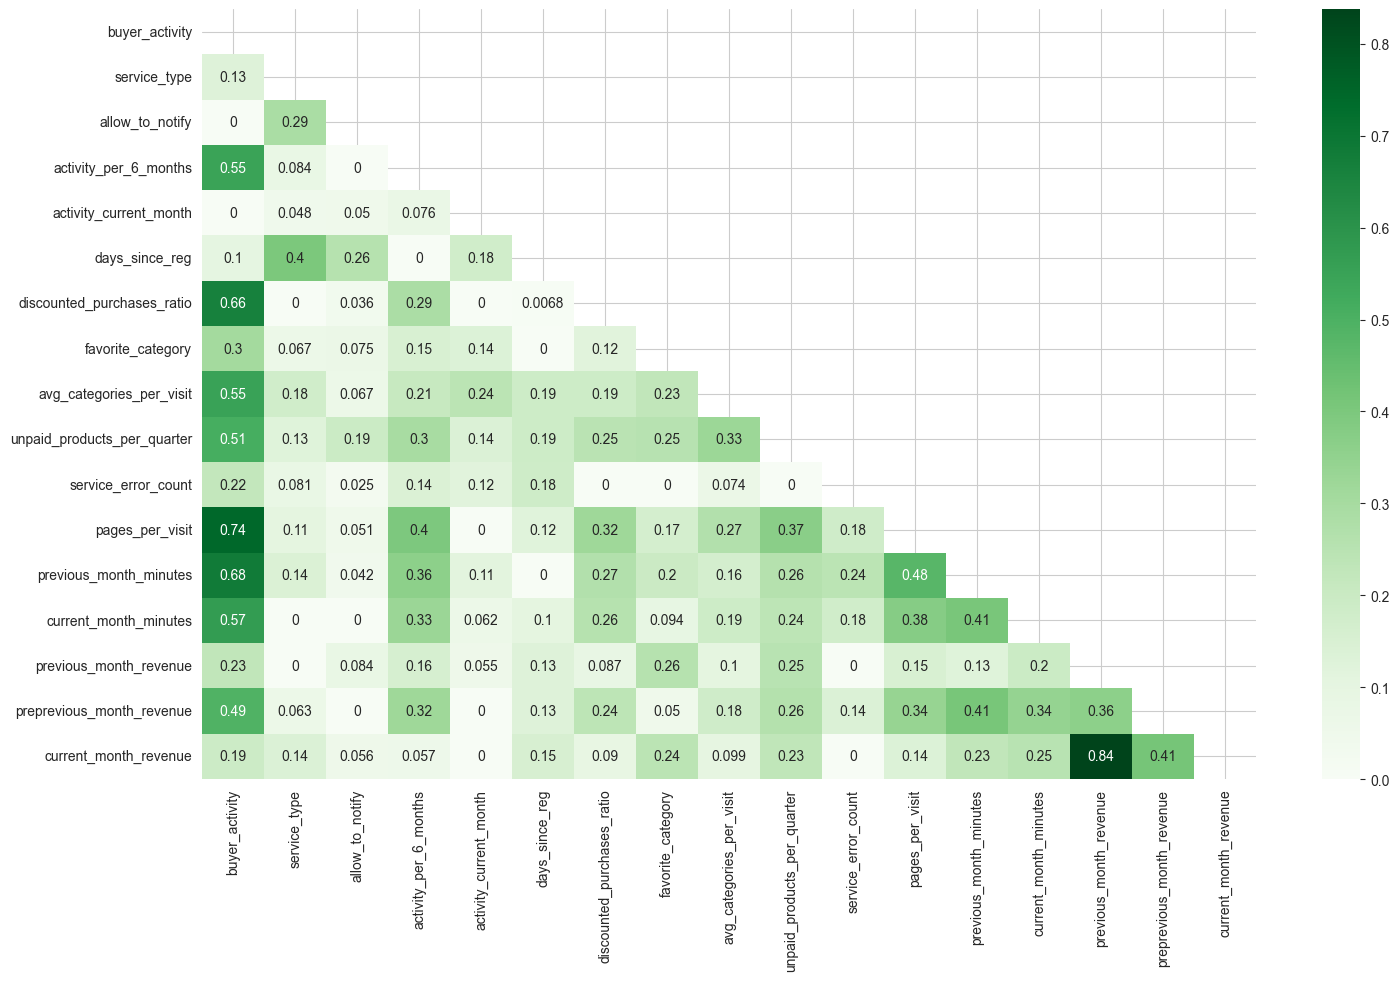

In [47]:
ic = df.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(17, 10))
sns.heatmap(
    df.phik_matrix(interval_cols=ic),
    annot=True, cmap='Greens',
    mask=(np.triu(np.ones_like(df.phik_matrix(interval_cols=ic), dtype=bool)))
)

plt.show()

### Вывод:

У двух столбцов не было корреляции с целевым признаком: `activity_current_math` и `allow_to_notify`. Попробуем обучить модель на данных с этими столбцами и без них, и посмотрим, что произойдет с точностью модели.<br>
Сильнее всего на целевой признак влияет количество просмотренных страниц (`pages_per_visit`) и количество минут, проведенных в последнем месяце (`previous_month_minutes`).<br>
Мультиколлинеарность присутствует у 2-х признаков: `current_month_revenue` и `previous_month_revenue`, однако они не сильно влияют на целевой признак. Пока что оставим эти признаки и попробуем позже удалить их, может это повысит точность модели.


Ранее мы выделили 2 столбца, в которых присутствует явный дисбаланс классов: `allow_to_notify` `service_type`. Мы хотели посмотреть, как они коррелируют с целевым признаком, чтобы решить, нужно ли использовать сэмплирование, однако корреляция составляет `0` `0.13` соответственно, так что скорее всего при оптимизации модели эти признаки даже не войдут в список наиболее значимых.



## Использование пайплайнов

Применим все изученные модели. Для этого используем пайплайны.
<br>
<br>
1. Во время подготовки данных используем `ColumnTransformer`. Количественные и категориальные признаки обработаем в пайплайне раздельно. Для кодирования категориальных признаков используем
`OneHotEncoder()`, `OrdinalEncoder`, для масштабирования количественных — `MinMaxScaler`, `StandartScaler()`, `RobustScaler()`.
2. Обучим четыре модели: `KNeighborsClassifier()`, `DecisionTreeClassifier()`, `LogisticRegression()` и `SVC()`. Для каждой из них подберем как минимум один гиперпараметр.
3. Выберем лучшую модель

In [48]:
# Посмотрим таблицы и к какому типу данных они принадлежат
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, 215351 to 216647
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   buyer_activity               1284 non-null   object 
 1   service_type                 1284 non-null   object 
 2   allow_to_notify              1284 non-null   object 
 3   activity_per_6_months        1284 non-null   float64
 4   activity_current_month       1284 non-null   int64  
 5   days_since_reg               1284 non-null   int64  
 6   discounted_purchases_ratio   1284 non-null   float64
 7   favorite_category            1284 non-null   object 
 8   avg_categories_per_visit     1284 non-null   int64  
 9   unpaid_products_per_quarter  1284 non-null   int64  
 10  service_error_count          1284 non-null   int64  
 11  pages_per_visit              1284 non-null   int64  
 12  previous_month_minutes       1284 non-null   float64
 13  current_month_mi

,buyer_activity,service_type,allow_to_notify,activity_per_6_months,activity_current_month,days_since_reg,discounted_purchases_ratio,favorite_category,avg_categories_per_visit,unpaid_products_per_quarter,service_error_count,pages_per_visit,previous_month_minutes,current_month_minutes,previous_month_revenue,preprevious_month_revenue,current_month_revenue
id,,,,,,,,,,,,,,,,,
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11.0,13.0,6158.0,4793.0,6610.4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8.0,11.0,5807.5,4594.0,5872.5


In [49]:
# Создаем списки с числовыми, категориальными, и ординальными значениями
num_col_names = df.select_dtypes(include=['number']).columns.tolist()
cat_col_names = ['allow_to_notify', 'favorite_category']
ord_col_names = ['service_type']

# Разбиваем данные на выборки
RANDOM_STATE = 42

X = df.drop('buyer_activity', axis=1)
y = df['buyer_activity']

# Кодируем целевой признак
y = y.apply(lambda x: 0 if x == 'Снизилась' else 1)

# Разбиваем данные на выборки
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)

#### Построение пайплайна

In [50]:
num_pipeline = Pipeline(
    [
        (
            'num',
            StandardScaler(),
        ),
    ]
)

# Пайплайн для обработки категориальных значений
ohe_pipeline = Pipeline(
    [
        (
            'ohe',
            OneHotEncoder(drop='first', sparse_output=False, handle_unknown='error'),
        ),
    ]
)

# Пайплайн для обработки ординальных значений
ord_pipeline = Pipeline(
    [
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            ),
        ),
    ]
)

# Собираем предыдущие пайплайны в один общий по кодированию данных
data_preprocessor = ColumnTransformer(
    [
        ('num', num_pipeline, num_col_names),
        ('ohe', ohe_pipeline, cat_col_names),
        ('ord', ord_pipeline, ord_col_names),
    ],
    remainder='passthrough',
)

# Собираем в конечный пайплайн
final_pipeline = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('select_k_best', SelectKBest(score_func=mutual_info_classif, k=10)),
        ('models', LogisticRegression(random_state=RANDOM_STATE)),
    ]
)

In [51]:
# Создаем сетку параметров
param_grid = [
    # Словарь для логистической регрессии
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 20),
        'preprocessor__num': [MinMaxScaler(), StandardScaler(), RobustScaler(), 'passthrough'],
        'select_k_best__k': range(5, X_train.shape[1] + 1),
    },

    # Словарь для метода опорных векторов(SVC)
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True, class_weight='balanced')],
        'models__C': range(1, 20),
        'models__kernel': ['rbf', 'poly', 'sigmoid'],
        'preprocessor__num': [MinMaxScaler(), StandardScaler(), RobustScaler(), 'passthrough'],
        'select_k_best__k': range(5, X_train.shape[1] + 1),
    },

    # Словарь для метода ближайших соседей
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [MinMaxScaler(), StandardScaler(), RobustScaler(), 'passthrough'],
        'select_k_best__k': range(5, X_train.shape[1] + 1),
    },

    # Словарь для дерева решений
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')],
        'models__max_depth': range(1, 15),
        'models__max_features': range(1, 15),
        'models__min_samples_leaf': range(1, 15),
        'models__min_samples_split': range(2, 15),
        'preprocessor__num': [MinMaxScaler(), StandardScaler(), RobustScaler(), 'passthrough'],
        'select_k_best__k': range(5, X_train.shape[1] + 1),
    }
]

#### Применение пайплайна

In [52]:
randomized_search = RandomizedSearchCV(
    final_pipeline,
    param_grid,
    n_jobs=-1,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('num',
                                                                                                StandardScaler())]),
                                                                               ['activity_per_6_months',
                                                                                'activity_current_month',
                                                                                'days_since_reg',
                                                                                'discounted_purchases_ratio',
                                                                                'avg_categories_per_visit',
                                                                                'unpaid_products_per_quarter',
                                                                                'service_error_count',
                                                                                'pages_p...
                                        {'models': [DecisionTreeClassifier(class_weight='balanced',
                                                                           random_state=42)],
                                         'models__max_depth': range(1, 15),
                                         'models__max_features': range(1, 15),
                                         'models__min_samples_leaf': range(1, 15),
                                         'models__min_samples_split': range(2, 15),
                                         'preprocessor__num': [MinMaxScaler(),
                                                               StandardScaler(),
                                                               RobustScaler(),
                                                               'passthrough'],
                                         'select_k_best__k': range(5, 17)}],
                   random_state=42, scoring='roc_auc')

In [53]:
print(randomized_search.best_score_.round(2))

0.86


In [54]:
best_model = randomized_search.best_estimator_
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', 'passthrough',
                                                  ['activity_per_6_months',
                                                   'activity_current_month',
                                                   'days_since_reg',
                                                   'discounted_purchases_ratio',
                                                   'avg_categories_per_visit',
                                                   'unpaid_products_per_quarter',
                                                   'service_error_count',
                                                   'pages_per_visit',
                                                   'previous_month_minutes',
                                                   'current_month_minutes'...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['service_type'])])),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('select_k_best',
                 SelectKBest(k=15,
                             score_func=<function mutual_info_classif at 0x11b6ba7a0>)),
                ('models',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                                        max_features=8, min_samples_leaf=6,
                                        min_samples_split=6,
                                        random_state=42))])

In [55]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print(roc_auc_score(y_test, y_pred_proba).round(2))

0.89


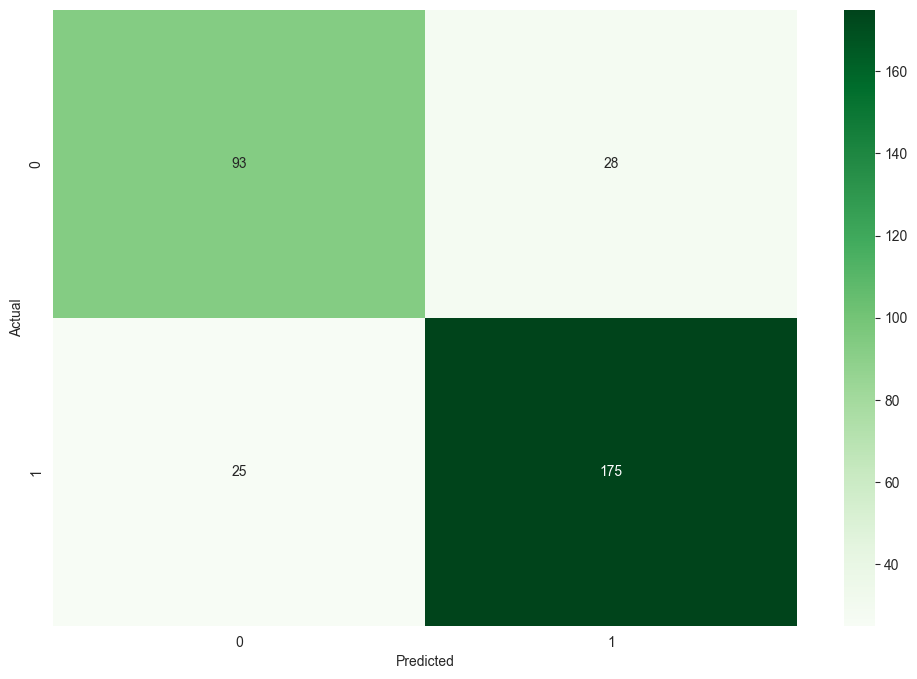

In [56]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='d',
    cmap='Greens',
)
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

Нам не было дано инструкций, что для заказчика важнее, количество `False Positive` или же `False Negative`, однако модель ошибается примерно одинаково

Ранее мы хотели посмотреть, как удаление/изменение данных повлияет на точность итоговой модели. Для этого мы использовали метод `SelectKBest`, который оптимизирует нашу модель, чтобы получать максимально высокий результат, одновременно "удаляя" ненужные столбцы. Метод указыват, что наилучшее количество признаков, при которой модель предсказывает с достаточно высокой точностью, но не строит слишком сложные связи — это 7 признаков

### Вывод:

Лучшей моделью у нас является `DecisionTreeClassifier()` со следующими параметрами:
 - Количество признаков, полученных методом `SelectKBest`=12
 - max_depth=6
 - max_features=7
 - min_samples_leaf=5
 - min_samples_split=5

Точность модели составляет `0.86` на тренировочной выборке и `0.85` на тестовой. Для оценки модели мы использовали метрику `roc-auc`, потому что она учитывает баланс классов. Так как у нас в данных наблюдается дисбаланс классов, то для нас это особенно важно. Еще очевидным плюсом является то, что ее можно легко интерпретировать

## Анализ важности признаков

1. Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP.
2. Сделаем выводы о значимости признаков:
    - какие признаки мало значимы для модели;
    - какие признаки сильнее всего влияют на целевой признак;
    - как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

In [57]:
# best_model = randomized_search.best_estimator_
X_train_shap = pd.DataFrame(
    final_pipeline.named_steps['preprocessor'].fit_transform(X_train),
    columns=final_pipeline.named_steps['preprocessor'].get_feature_names_out()
)

X_test_shap = pd.DataFrame(
    final_pipeline.named_steps['preprocessor'].fit_transform(X_test),
    columns=final_pipeline.named_steps['preprocessor'].get_feature_names_out()
)

model = randomized_search.best_estimator_.named_steps['models']
model.fit(X_train_shap, y_train)

explainer = shap.TreeExplainer(model, X_train_shap)

shap_values = explainer(X_test_shap)
plt.show()

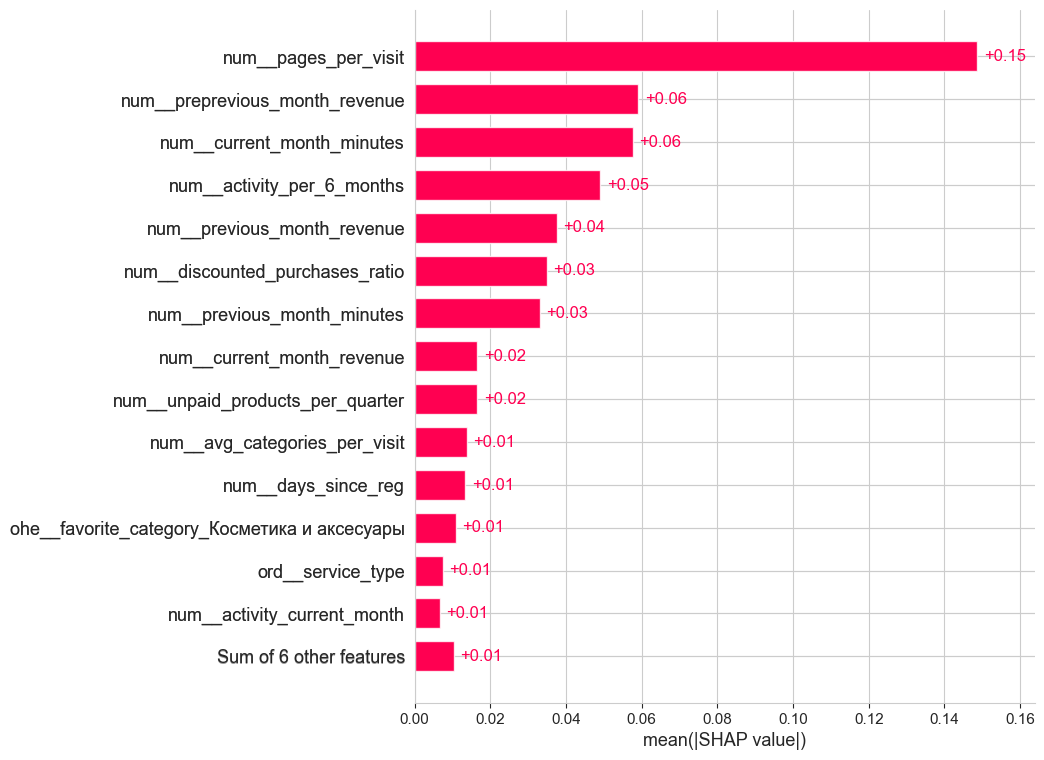

In [58]:
shap.plots.bar(shap_values[:, :, 1], max_display=15)

Ранее с помощью `SelectKBest` мы отобрали, что всего 7 признаков, которые наиболее всего влияют на предсказания модели:
 - `pages_per_visit`
 - `previous_month_minutes`
 - `current_month_minutes`
 - `discounted_purchases_ratio`
 - `avg_categories_per_visit`
 - `activity_per_6_months`
 - `previous_month_revenue`

Остальные признаки вносят незначительный вклад в решения модели

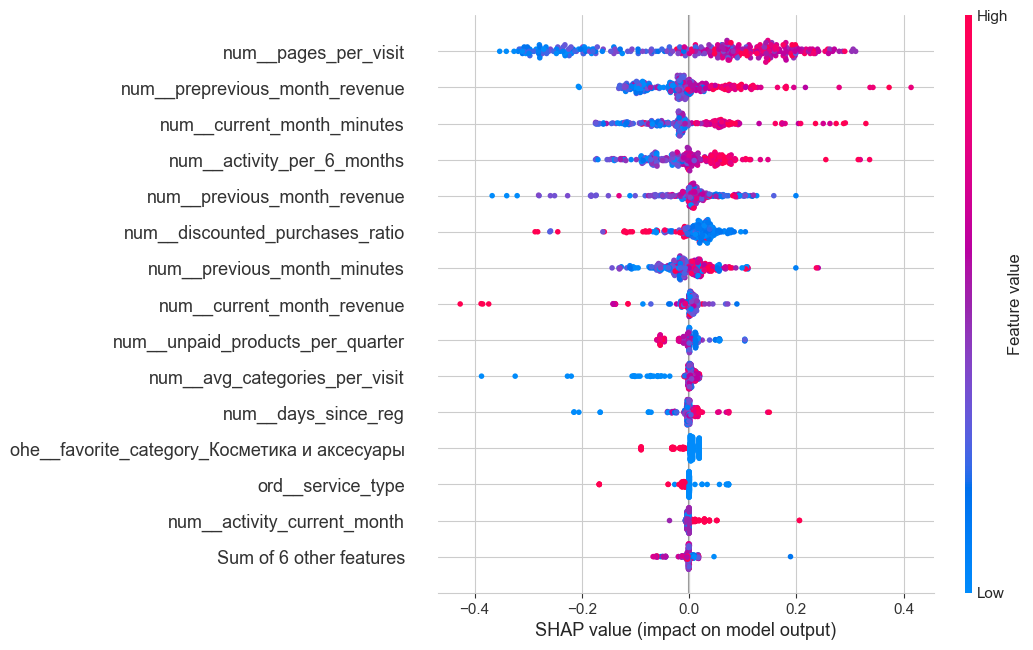

In [59]:
shap.plots.beeswarm(shap_values[:, :, 1], max_display=15)

Глядя на этот график, мы можем сказать, что чем меньше страниц пользователь просмотрел за визит, тем вероятнее, что модель отнесет его к классу 0. Идентичная ситуация с количеством минут, проведенных на сайте в прошлом и настоящем месяцах. В случае же с долей покупок по акции от общего числа покупок за последние 6 месяцев, то чем она выше, тем больше вероятность, что покупательская активность снизиться. Логично предположить, что пользователи, у которых высокая доля, покупают в те моменты, когда видят скидки на нужный им товар, и следовательно, не готовы тратить деньги в периоды, когда товар продается за полную цену, отчего их покупательская активность снижается. Если говорить о среднем количестве просмотренных категорий за посещение, маркетинговой активности за последние 6 месяцев, и выручкой с клиента, полученной за последней месяц — здесь все аналогично вышеописанным признакам. Чем меньше значение этих признаков, тем больше вероятность, что модель отнесет их к классу 0

In [60]:
# shap.plots.waterfall(shap_values[:, :, 1][31])

### Вывод:

Ранее с помощью `SelectKBest` мы отобрали, что всего 7 признаков, которые наиболее всего влияют на предсказания модели:
 - `pages_per_visit` — среднее количество страниц, просмотренных за визит
 - `previous_month_minutes` — количество минут, проведенных на сайте в предыдущем месяце
 - `current_month_minutes` — количество минут, проведенных на сайте в текущем месяце
 - `discounted_purchases_ratio` — доля покупок товаров со скидкой от общего числа покупок
 - `avg_categories_per_visit` — среднее количество просмотренных категорий за визит
 - `activity_per_6_months` — маркетинговая активность за последние 6 месяцев
 - `preprevious_month_revenue` — выручка за препредыдущий месяц

Это признаки, на основании которых модель принимает решение о том, к какому классу отнести объект. Среди них можно выделить первые 4 признака, как те, которые вносят наибольший вклад в принятия решения. Наименьший же же вклад вносят следующие признаки:
 - `allow_to_notyfy` — разрешение на
 - `service_error_count` — количество ошибок сервера
 - `current_month_revenue` — выручка за текущий месяц
 - `previous_month_revenue` — выручка за предыдущий месяц
 - `days_since_reg` — согласие на то, можно ли присылать покупателю дополнительные предложения о товаре


Проанализировав графики, мы можем сказать, что чем меньше страниц пользователь просмотрел за визит, тем вероятнее, что модель отнесет его к классу 0. Идентичная ситуация с количеством минут, проведенных на сайте в прошлом и настоящем месяцах. В случае же с долей покупок по акции от общего числа покупок за последние 6 месяцев, то чем она выше, тем больше вероятность, что покупательская активность снизиться. Логично предположить, что пользователи, у которых высокая доля, покупают в те моменты, когда видят скидки на нужный им товар, и следовательно, не готовы тратить деньги в периоды, когда товар продается за полную цену, отчего их покупательская активность снижается. Если говорить о среднем количестве просмотренных категорий за посещение, маркетинговой активности за последние 6 месяцев, и выручкой с клиента, полученной за последней месяц — здесь все аналогично вышеописанным признакам. Чем меньше значение этих признаков, тем больше вероятность, что модель отнесет их к классу 0

## Сегментация покупателей

Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей.

In [61]:
segment_df = X_test.merge(money, on='id', how='left')
segment_df['y_probability'] = y_pred_proba

segment_df = segment_df.set_index('id')
segment_df

,service_type,allow_to_notify,activity_per_6_months,activity_current_month,days_since_reg,discounted_purchases_ratio,favorite_category,avg_categories_per_visit,unpaid_products_per_quarter,service_error_count,pages_per_visit,previous_month_minutes,current_month_minutes,previous_month_revenue,preprevious_month_revenue,current_month_revenue,profit,y_probability
id,,,,,,,,,,,,,,,,,,
215370,стандарт,да,3.9,4,572,0.40,Домашний текстиль,2,0,5,5,7.0,10.0,5235.5,4535.0,4840.3,2.82,0.000000
216124,премиум,да,4.4,4,707,0.23,Мелкая бытовая техника и электроника,5,1,5,7,13.0,18.0,4990.5,5211.0,4929.4,4.75,1.000000
216574,премиум,да,5.5,4,873,0.12,Косметика и аксесуары,6,4,2,10,9.0,12.0,5052.0,4653.0,5527.8,2.90,0.857075
215736,премиум,да,5.6,3,540,0.36,Косметика и аксесуары,2,4,2,8,8.0,11.0,5049.0,4734.0,5168.6,3.43,0.000000
215455,премиум,да,4.0,3,937,0.22,Косметика и аксесуары,2,4,3,4,12.0,10.0,5288.5,4564.0,5175.4,2.53,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216362,премиум,да,3.9,4,776,0.30,Товары для детей,3,1,3,8,14.0,17.0,5287.0,5055.0,5215.5,2.26,0.910669
216572,стандарт,нет,5.3,4,1013,0.26,Мелкая бытовая техника и электроника,4,0,1,4,11.0,16.0,5256.5,5363.0,5294.2,3.89,1.000000
216639,стандарт,да,4.8,4,306,0.29,Товары для детей,4,5,3,7,14.0,22.0,4648.0,4591.0,4827.4,3.26,0.910669


В качестве значения для сегментации, используем среднее значение вероятности. Для пользователей, у которых вероятность ниже этой, присвоим метку `Активность снизилась`, для пользователей же со значением выше среднего, присвоим метку `Активность не изменилась`

In [62]:
proba_mean = segment_df['y_probability'].mean()
print(f'Среднее значение вероятности: {proba_mean:.4f}')
lower_segment = segment_df.query('y_probability < @proba_mean')
lower_segment.head()

Среднее значение вероятности: 0.5708


,service_type,allow_to_notify,activity_per_6_months,activity_current_month,days_since_reg,discounted_purchases_ratio,favorite_category,avg_categories_per_visit,unpaid_products_per_quarter,service_error_count,pages_per_visit,previous_month_minutes,current_month_minutes,previous_month_revenue,preprevious_month_revenue,current_month_revenue,profit,y_probability
id,,,,,,,,,,,,,,,,,,
215370,стандарт,да,3.9,4,572,0.40,Домашний текстиль,2,0,5,5,7.0,10.0,5235.5,4535.0,4840.3,2.82,0.00000
215736,премиум,да,5.6,3,540,0.36,Косметика и аксесуары,2,4,2,8,8.0,11.0,5049.0,4734.0,5168.6,3.43,0.00000
215455,премиум,да,4.0,3,937,0.22,Косметика и аксесуары,2,4,3,4,12.0,10.0,5288.5,4564.0,5175.4,2.53,0.00000
215578,стандарт,да,2.4,4,699,0.35,Мелкая бытовая техника и электроника,2,4,5,3,10.0,7.0,5328.5,4778.0,5801.7,3.88,0.00000
216329,премиум,да,5.5,4,894,0.99,Техника для красоты и здоровья,4,0,7,11,14.0,14.0,4041.0,4659.0,4706.6,2.42,0.37487


In [63]:
upper_segment = segment_df.query('y_probability > @proba_mean')
upper_segment.head()

,service_type,allow_to_notify,activity_per_6_months,activity_current_month,days_since_reg,discounted_purchases_ratio,favorite_category,avg_categories_per_visit,unpaid_products_per_quarter,service_error_count,pages_per_visit,previous_month_minutes,current_month_minutes,previous_month_revenue,preprevious_month_revenue,current_month_revenue,profit,y_probability
id,,,,,,,,,,,,,,,,,,
216124,премиум,да,4.4,4,707,0.23,Мелкая бытовая техника и электроника,5,1,5,7,13.0,18.0,4990.5,5211.0,4929.4,4.75,1.000000
216574,премиум,да,5.5,4,873,0.12,Косметика и аксесуары,6,4,2,10,9.0,12.0,5052.0,4653.0,5527.8,2.90,0.857075
216290,стандарт,да,3.9,5,466,0.20,Товары для детей,5,1,3,11,12.0,12.0,5514.0,5336.0,5489.3,3.90,0.893564
216341,стандарт,да,5.1,4,793,0.13,Домашний текстиль,5,1,3,12,13.0,14.0,4860.5,4766.0,5072.4,2.59,0.893564
216493,стандарт,да,5.3,4,129,0.21,Домашний текстиль,4,5,2,17,16.0,9.0,5371.5,4944.0,5872.0,5.95,0.831855


In [64]:
# Создаем сводную таблицу пользователей из "нижнего сегмента"
lower_segment_pivot = lower_segment.pivot_table(index='favorite_category',
                                                values=lower_segment.select_dtypes(
                                                    include=['number']).columns.to_list(),
                                                aggfunc={
                                                    'discounted_purchases_ratio': 'median',
                                                    'pages_per_visit': 'sum',
                                                    'current_month_minutes': 'median',
                                                    'current_month_revenue': 'sum',
                                                    'profit': 'sum',
                                                    'y_probability': 'mean'
                                                }).sort_values('y_probability', ascending=False)
lower_segment_pivot

,current_month_minutes,current_month_revenue,discounted_purchases_ratio,pages_per_visit,profit,y_probability
favorite_category,,,,,,
Мелкая бытовая техника и электроника,11.0,57137.3,0.375,74,37.16,0.341052
Техника для красоты и здоровья,11.0,68690.3,0.250,116,53.21,0.211604
Товары для детей,11.5,191644.2,0.285,224,147.95,0.161246
Кухонная посуда,11.0,134202.2,0.315,121,94.11,0.114986
Домашний текстиль,10.0,162076.9,0.330,177,109.60,0.098948
Косметика и аксесуары,11.0,122545.7,0.350,124,93.93,0.092083


In [65]:
# Создаем сводную таблицу пользователей из "верхнего сегмента"
upper_segment_pivot = upper_segment.pivot_table(index='favorite_category',
                                                values=upper_segment.select_dtypes(
                                                    include=['number']).columns.to_list(),
                                                aggfunc={
                                                    'discounted_purchases_ratio': 'median',
                                                    'pages_per_visit': 'sum',
                                                    'current_month_minutes': 'median',
                                                    'current_month_revenue': 'sum',
                                                    'profit': 'sum',
                                                    'y_probability': 'mean'
                                                }).sort_values('y_probability', ascending=False)
upper_segment_pivot

,current_month_minutes,current_month_revenue,discounted_purchases_ratio,pages_per_visit,profit,y_probability
favorite_category,,,,,,
Мелкая бытовая техника и электроника,16.0,154472.6,0.210,256,111.11,0.908248
Кухонная посуда,13.0,114707.6,0.200,168,86.17,0.905556
Техника для красоты и здоровья,13.0,138835.5,0.230,266,98.62,0.903185
Домашний текстиль,14.0,195044.3,0.205,430,160.51,0.876259
Товары для детей,15.0,234905.5,0.210,479,195.48,0.872669
Косметика и аксесуары,15.0,113678.3,0.210,230,81.60,0.864961


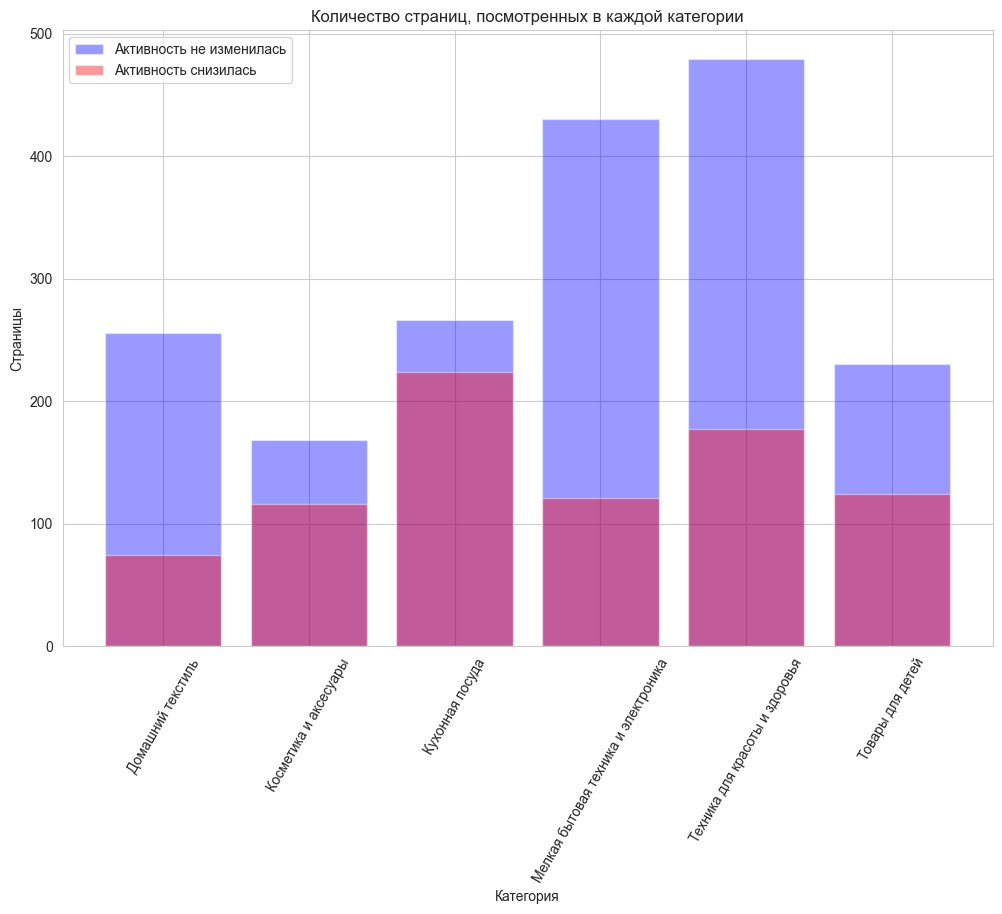

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(upper_segment_pivot.sort_values('favorite_category').index,
       upper_segment_pivot['pages_per_visit'],
       color='blue', alpha=0.4, label='Активность не изменилась')

ax.bar(lower_segment_pivot.sort_values('favorite_category').index,
       lower_segment_pivot['pages_per_visit'],
       color='red', alpha=0.4, label='Активность снизилась')

plt.xlabel('Категория')
plt.xticks(rotation=60)
plt.ylabel('Страницы')
plt.title('Количество страниц, посмотренных в каждой категории')
plt.legend()

plt.grid(True)
plt.show()

Пользователи, у которых покупательская активность осталась на прежнем уровне принципе просматривают больше страниц, однако можно отметить, что в трех категориях количество просмотренных страниц у пользователей с не изменившейся активностью, кратно выше, чем у пользователей со снизившейся покупательской активностью:
- Кухонная посуда
- Домашний текстиль
- Косметика и аксессуары

В категории "мелкая бытовая техника и электроника" пользователи со сниженной покупательской активностью преобладают надо пользователями с прежней покупательской активностью. Можно предположить, что пользователи из первой категории приобретают товары редко, но, более ценные. Грубо говоря, пользователи из первой категории покупают более дешевые вещи, но чаще, в то время как пользователи из второй категории покупают реже, но более дорогие вещи. Посмотрим, как пользователи из разных сегментов тратят деньги по категориям

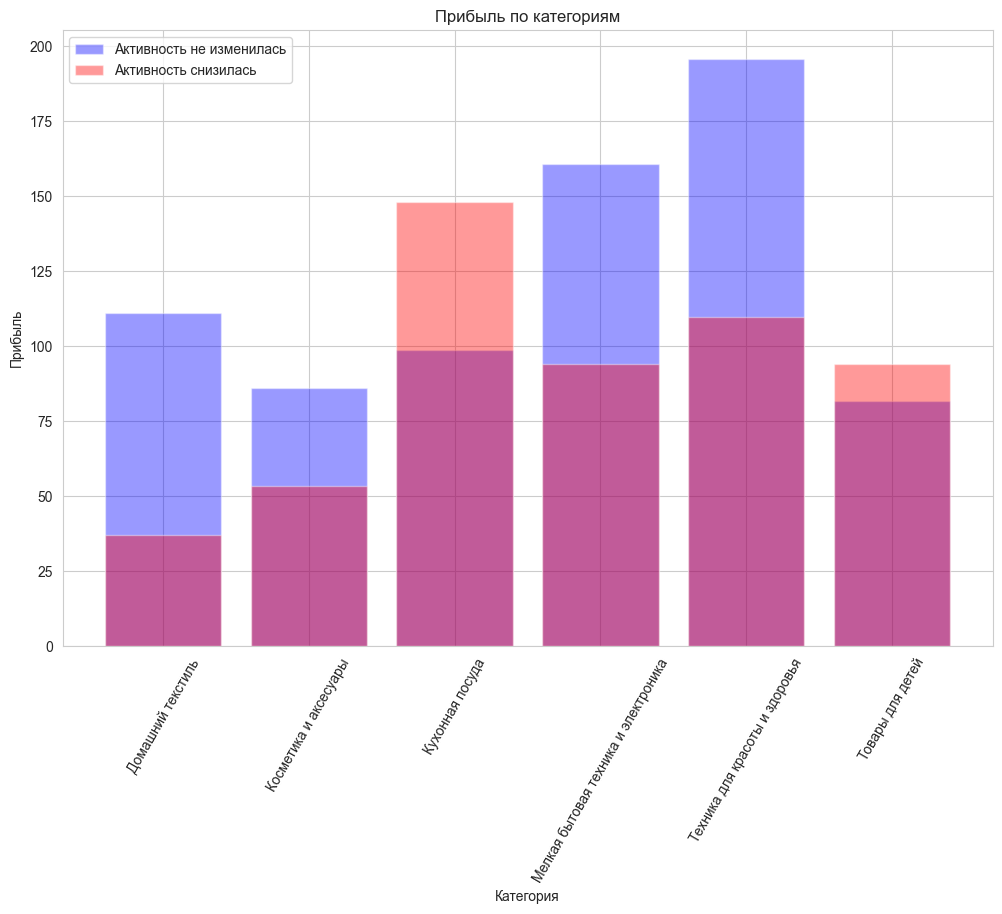

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(upper_segment_pivot.sort_values('favorite_category').index,
       upper_segment_pivot['profit'],
       color='blue', alpha=0.4, label='Активность не изменилась')

ax.bar(lower_segment_pivot.sort_values('favorite_category').index,
       lower_segment_pivot['profit'],
       color='red', alpha=0.4, label='Активность снизилась')

plt.xlabel('Категория')
plt.xticks(rotation=60)
plt.ylabel('Прибыль')
plt.title('Прибыль по категориям')
plt.legend()

plt.grid(True)
plt.show()

In [68]:
# Сравним количество пользователй по сегментам
print('Количество пользователей со снизившейся активностью', lower_segment['profit'].count())
print('Прибыль от пользователей со снизившейся активностью', lower_segment_pivot['profit'].sum().round(2))
print()
print('Количество пользователей с прежней активностью', upper_segment['profit'].count())
print('Прибыль от пользователей с прежней активностью', upper_segment_pivot['profit'].sum().round(2))

Количество пользователей со снизившейся активностью 137
Прибыль от пользователей со снизившейся активностью 535.96

Количество пользователей с прежней активностью 184
Прибыль от пользователей с прежней активностью 733.49


Количество пользователей с прежней активностью у нас превышает количество пользователей со снизившейся активностью. Так же прибыль от них больше, потому сфокусируемся на них. Нам нужно понять, как удержать таких пользователей. Посмотрим на то, какие категории им интересны

In [69]:
upper_segment_pivot

,current_month_minutes,current_month_revenue,discounted_purchases_ratio,pages_per_visit,profit,y_probability
favorite_category,,,,,,
Мелкая бытовая техника и электроника,16.0,154472.6,0.210,256,111.11,0.908248
Кухонная посуда,13.0,114707.6,0.200,168,86.17,0.905556
Техника для красоты и здоровья,13.0,138835.5,0.230,266,98.62,0.903185
Домашний текстиль,14.0,195044.3,0.205,430,160.51,0.876259
Товары для детей,15.0,234905.5,0.210,479,195.48,0.872669
Косметика и аксесуары,15.0,113678.3,0.210,230,81.60,0.864961


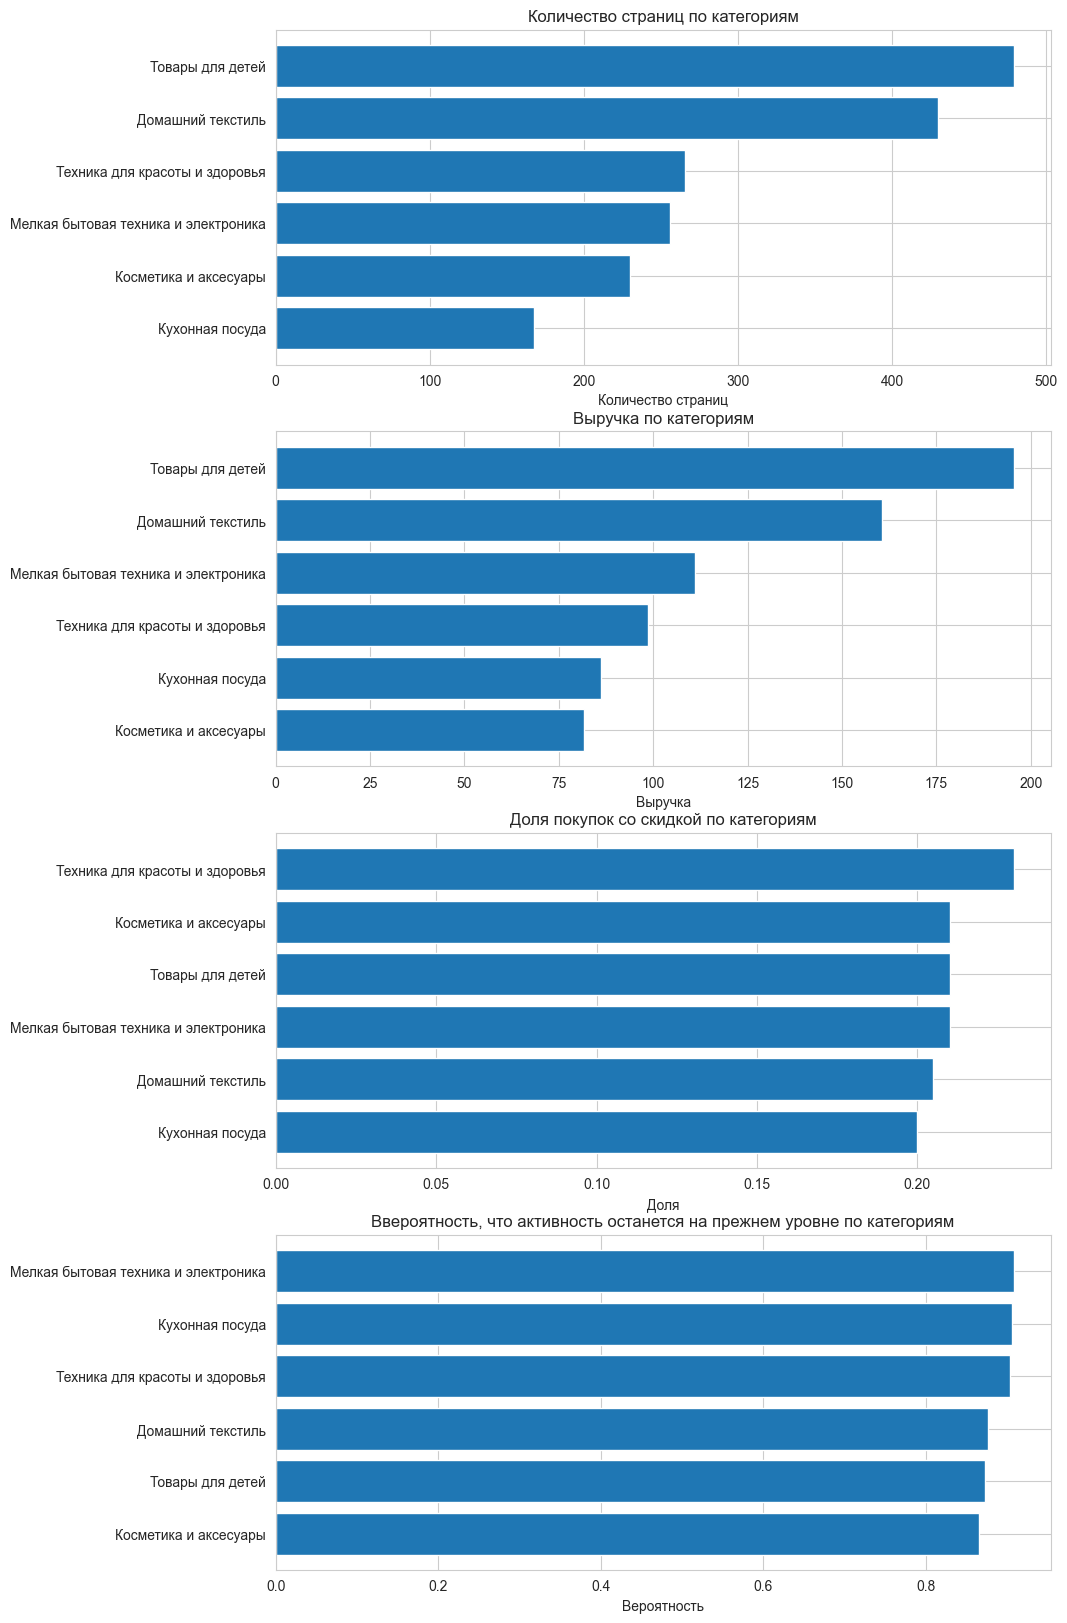

In [70]:
fig, ax = plt.subplots(4, 1, figsize=(10, 20))

ax[0].barh(
    upper_segment_pivot.sort_values('pages_per_visit', ascending=True).index,
    upper_segment_pivot.sort_values('pages_per_visit', ascending=True)['pages_per_visit'],
)
ax[0].set_xlabel('Количество страниц')
ax[0].set_title('Количество страниц по категориям')

ax[1].barh(
    upper_segment_pivot.sort_values('profit', ascending=True).index,
    upper_segment_pivot.sort_values('profit', ascending=True)['profit'],
)
ax[1].set_xlabel('Выручка')
ax[1].set_title('Выручка по категориям')

ax[2].barh(
    upper_segment_pivot.sort_values('discounted_purchases_ratio', ascending=True).index,
    upper_segment_pivot.sort_values('discounted_purchases_ratio', ascending=True)['discounted_purchases_ratio'],
)
ax[2].set_xlabel('Доля')
ax[2].set_title('Доля покупок со скидкой по категориям')

ax[3].barh(
    upper_segment_pivot.sort_values('y_probability', ascending=True).index,
    upper_segment_pivot.sort_values('y_probability', ascending=True)['y_probability'],
)
ax[3].set_xlabel('Вероятность')
ax[3].set_title('Ввероятность, что активность останется на прежнем уровне по категориям')

plt.show()

Мы видим, что вероятность, что покупательская активность останется на прежнем уровне почти одинакова вне зависимости от категории. Можно отметить, что в категории "косметика и аксессуары" и "мелкая бытовая техника и электроника" вероятность чуть ниже.<br>
Пользователи просматривают большее количество страниц в категориях "Товары для детей", "Домашний текстиль", и "Техника для красоты и здоровья". В этих же категориях пользователи тратят больше всего денег.<br>
Доля покупок со скидкой так же не сильно отличается по категориям, можно отметить только, что в категориях "Косметика и аксессуары", "Кухонная посуда", "Домашний текстиль" доля покупок со скидкой чуть ниже. <br>
Подытоживая, можно сказать, что если мы хотим, чтобы покупательская активность осталась прежней, то нам нужно, чтобы в категориях "Домашний текстиль", "Техника для красоты и здоровья", "Товары для детей" было немного товаров со скидками. Так как в этих категориях люди покупают товары чаще всего и без скидок. Так же можно чаще показывать товары из этих категорий, потому что они пользуются спросом, ибо количество просмотренных страниц в данных категориях выше всего. Однако причиной тому может являться то, что пользователям тяжело найти товар, подходящий под их нужды. В таком случае надо улучшить алгоритм рекомендаций похожих товаров и заново собрать данные. Если количество просмотренных страниц в данных категориях снизиться, а прибыль останется на прежнем уровне, то проблема как раз была в алгоритме предложения похожих товаров. <br>
 Если же мы хотим повысить выручку, то можно предлагать товары со скидкой из категорий "Косметика и аксессуары", "Кухонная посуда", "Мелка бытовая техника" чуть чаще, ибо эти товары обладают наименьшим спросом и выручкой, и люди смотрят меньше всего страниц из этих категорий. Если мы будем смотреть предлагать товары из данной категории со скидкой, то есть вероятность, что пользователь захочет приобрести данный товар.

### Вывод:
В качестве значения для сегментации, использовали среднее значение вероятности отнесения к первому классу. Для пользователей, у которых вероятность ниже этой, присвоим метку `Активность снизилась`, для пользователей же со значением выше среднего, присвоим метку `Активность не изменилась`. Сфокусировались же мы на группе, у которой покупательская активность осталась на прежнем уровне, ибо таких пользователей больше, и они приносят большую прибыль

Пользователи, у которых покупательская активность осталась на прежнем уровне принципе просматривают больше страниц, однако можно отметить, что в трех категориях количество просмотренных страниц у пользователей с не изменившейся активностью, кратно выше, чем у пользователей со снизившейся покупательской активностью:
- Кухонная посуда
- Домашний текстиль
- Косметика и аксессуары

В категории "мелкая бытовая техника и электроника" пользователи со сниженной покупательской активностью преобладают надо пользователями с прежней покупательской активностью. Можно предположить, что пользователи из первой категории приобретают товары редко, но, более ценные. Грубо говоря, пользователи из первой категории покупают более дешевые вещи, но чаще, в то время как пользователи из второй категории покупают реже, но более дорогие вещи. Посмотрим, как пользователи из разных сегментов тратят деньги по категориям


Мы видим, что вероятность, что покупательская активность останется на прежнем уровне почти одинакова вне зависимости от категории. Можно отметить, что в категории "косметика и аксессуары" и "мелкая бытовая техника и электроника" вероятность чуть ниже.<br>
Пользователи просматривают большее количество страниц в категориях "Товары для детей", "Домашний текстиль", и "Техника для красоты и здоровья". В этих же категориях пользователи тратят больше всего денег.<br>
Доля покупок со скидкой так же не сильно отличается по категориям, можно отметить только, что в категориях "Косметика и аксессуары", "Кухонная посуда", "Домашний текстиль" доля покупок со скидкой чуть ниже. <br>
Подытоживая, можно сказать, что если мы хотим, чтобы покупательская активность осталась прежней, то нам нужно, чтобы в категориях "Домашний текстиль", "Техника для красоты и здоровья", "Товары для детей" было немного товаров со скидками. Так как в этих категориях люди покупают товары чаще всего и без скидок. Так же можно чаще показывать товары из этих категорий, потому что они пользуются спросом, ибо количество просмотренных страниц в данных категориях выше всего. Однако причиной тому может являться то, что пользователям тяжело найти товар, подходящий под их нужды. В таком случае надо улучшить алгоритм рекомендаций похожих товаров и заново собрать данные. Если количество просмотренных страниц в данных категориях снизиться, а прибыль останется на прежнем уровне, то проблема как раз была в алгоритме предложения похожих товаров. <br>
 Если же мы хотим повысить выручку, то можно предлагать товары со скидкой из категорий "Косметика и аксессуары", "Кухонная посуда", "Мелка бытовая техника" чуть чаще, ибо эти товары обладают наименьшим спросом и выручкой, и люди смотрят меньше всего страниц из этих категорий. Если мы будем смотреть предлагать товары из данной категории со скидкой, то есть вероятность, что пользователь захочет приобрести данный товар.

## Общий вывод:

Нам предстояло разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность. Для этого в качестве целевого признака мы выбрали признак `Покупательская активность`. Используя этот признак как целевой, мы смогли посмотреть, какие признаки больше всего влияют, и сделать предположение, что можно сделать, чтобы персонализировать предложения постоянным клиентам. Перед нами стояла задача бинарной классификации

<br>
<br>

Проведя исследовательский анализ данных, мы выявили, что в следующих столбцах, распределение похоже на нормальное:
   - `service_error_count`
   - `revenue`
   - `time_spent`
   - `profit`

В таблице `market_file` в 3 из 4-х категориальных столбцов присутствует дисбаланс классов

Проанализировав данные, разделенные по целевому признаку мы выявили следующее:
- Пользователи, чья активность снизилась в целом имели меньшую частоту действий за 6 месяцев и текущий месяц.
- Пользователи со сниженной активностью демонстрируют меньшую вовлеченность в последние месяцы, основываясь на гистограммах с количеством проведенных минут и просмотренных страниц.
- Отношение скидочных покупок выше у пользователей, чья активность снизилась, что может говорить о большей зависимости от акций.
- Среднее число категорий за визит также ниже у пользователей с пониженной активностью, что может свидетельствовать о том, что они заходят за каким-то конкретным товаром
- Пользователи с меньшей активностью сталкивались с большим числом ошибок в сервисе, что может быть одним из факторов снижения их вовлеченности.
- Мы видим, что несмотря на снижение активности, пользователи со сниженной активностью относительно схожий уровень доходов в предыдущем и текущем месяце, хотя распределение немного смещено к меньшим значениям.

Для того чтобы повысить заинтересованность группы с пониженной активностью, нужно стимулировать их просматривать больше страниц.<br>
Можно отметить, что среди пользователй, у которых снизился уровнь покупательской активности, чуть больше доля людей с премиум подпиской. Категории так же отличаются на пару-тройку процентов.<br>
Скорее всего, пользователь с пониженным уровнем покупательской активности — это человек, который заходит, чтобы купить какую-то конкретную вещь, так как время и количество просмотренных страниц у таких пользователей меньше. Пользователи с повышенной покупательской активностью скорее совершают импульсивные покупки, так как время, проведенное на маркете у них выше. Либо же они выбирают предметы более тщательно<br>

Пользователи, у которых покупательская активность осталась на прежнем уровне принципе просматривают больше страниц, однако можно отметить, что в трех категориях количество просмотренных страниц у пользователей с не изменившейся активностью, кратно выше, чем у пользователей со снизившейся покупательской активностью:
- Кухонная посуда
- Домашний текстиль
- Косметика и аксессуары


В категории "мелкая бытовая техника и электроника" пользователи со сниженной покупательской активностью преобладают над пользователями с прежней покупательской активностью. Можно предположить, что пользователи из первой категории приобретают товары редко, но, более ценные. Грубо говоря, пользователи из первой категории покупают более дешевые вещи, но чаще, в то время как пользователи из второй категории покупают реже, но более дорогие вещи.<br>


<br>
<br>

У двух столбцов не было корреляции с целевым признаком: `activity_current_math` и `allow_to_notify`.<br>
Сильнее всего на целевой признак влияет количество просмотренных страниц (`pages_per_visit`) и количество минут, проведенных в последнем месяце (`previous_month_minutes`).<br>
Мультиколлинеарность присутствует у 2-х признаков: `current_month_revenue` и `previous_month_revenue`, однако они не сильно влияют на целевой признак.<br>
Ранее мы выделили 2 столбца, в которых присутствует явный дисбаланс классов: `allow_to_notify` `service_type`. Мы хотели посмотреть, как они коррелируют с целевым признаком, чтобы решить, нужно ли использовать сэмплирование, однако корреляция составляет `0` `0.13` соответственно, потому мы их оставили. Тем более, что при оценке признаков, влияющих на целевой признак, этих 2-х не было, следовательно, большого вклада они не вносили


Лучшей моделью у нас является `DecisionTreeClassifier()` со следующими параметрами:
 - Количество признаков, полученных методом `SelectKBest`=12
 - max_depth=6
 - max_features=7
 - min_samples_leaf=5
 - min_samples_split=5

Точность модели составляет `0.86` на тренировочной выборке и `0.85` на тестовой. Для оценки модели мы использовали метрику `roc-auc`, потому что она учитывает баланс классов. Так как у нас в данных наблюдается дисбаланс классов, то для нас это особенно важно. Еще очевидным плюсом является то, что ее можно легко интерпретировать

<br>
<br>


Ранее с помощью `SelectKBest` мы отобрали, что всего 12 признаков, которые наиболее всего влияют на предсказания модели:
 - `pages_per_visit` — среднее количество страниц, просмотренных за визит
 - `previous_month_minutes` — количество минут, проведенных на сайте в предыдущем месяце
 - `current_month_minutes` — количество минут, проведенных на сайте в текущем месяце
 - `discounted_purchases_ratio` — доля покупок товаров со скидкой от общего числа покупок
 - `avg_categories_per_visit` — среднее количество просмотренных категорий за визит
 - `activity_per_6_months` — маркетинговая активность за последние 6 месяцев
 - `preprevious_month_revenue` — выручка за препредыдущий месяц

Это признаки, на основании которых модель принимает решение о том, к какому классу отнести объект. Среди них можно выделить первые 4 признака, как те, которые вносят наибольший вклад в принятия решения. Наименьший же же вклад вносят следующие признаки:
 - `allow_to_notyfy` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре
 - `service_error_count` — количество ошибок сервера
 - `current_month_revenue` — выручка за текущий месяц
 - `previous_month_revenue` — выручка за предыдущий месяц
 - `days_since_reg` — согласие на то, можно ли присылать покупателю дополнительные предложения о товаре

Проанализировав графики, мы можем сказать, что чем меньше страниц пользователь просмотрел за визит, тем вероятнее, что модель отнесет его к классу 0. Идентичная ситуация с количеством минут, проведенных на сайте в прошлом и настоящем месяцах. В случае же с долей покупок по акции от общего числа покупок за последние 6 месяцев, то чем она выше, тем больше вероятность, что покупательская активность снизиться. Логично предположить, что пользователи, у которых высокая доля, покупают в те моменты, когда видят скидки на нужный им товар, и следовательно, не готовы тратить деньги в периоды, когда товар продается за полную цену, отчего их покупательская активность снижается. Если говорить о среднем количестве просмотренных категорий за посещение, маркетинговой активности за последние 6 месяцев, и выручкой с клиента, полученной за последней месяц — здесь все аналогично вышеописанным признакам. Чем меньше значение этих признаков, тем больше вероятность, что модель отнесет их к классу 0



<br>
<br>



В качестве значения для сегментации, использовали среднее значение вероятности отнесения к первому классу. Для пользователей, у которых вероятность ниже этой, присвоим метку `Активность снизилась`, для пользователей же со значением выше среднего, присвоим метку `Активность не изменилась`. Сфокусировались же мы на группе, у которой покупательская активность осталась на прежнем уровне, ибо таких пользователей больше, и они приносят большую прибыль.<br>
Покупательская активность останется на прежнем уровне почти одинакова вне зависимости от категории. Можно отметить, что в категории "косметика и аксессуары" и "мелкая бытовая техника и электроника" вероятность чуть ниже.<br>
Пользователи просматривают большее количество страниц в категориях "Товары для детей", "Домашний текстиль", и "Техника для красоты и здоровья". В этих же категориях пользователи тратят больше всего денег.<br>
Если мы хотим, чтобы покупательская активность осталась прежней, то нам нужно, чтобы в категориях "Домашний текстиль", "Техника для красоты и здоровья", "Товары для детей" было немного товаров со скидками, так как в этих категориях люди покупают товары довольно часто и без скидок. Так же можно чаще показывать товары из этих категорий, потому что они пользуются спросом, ибо количество просмотренных страниц в данных категориях выше всего. Однако причиной тому может являться то, что пользователям тяжело найти товар, подходящий под их нужды. В таком случае надо улучшить алгоритм рекомендаций похожих товаров и заново собрать данные. Если количество просмотренных страниц в данных категориях снизиться, а прибыль останется на прежнем уровне, то проблема как раз была в алгоритме предложения похожих товаров. <br>
 Если же мы хотим повысить выручку, то можно предлагать товары со скидкой из категорий "Косметика и аксессуары", "Кухонная посуда", "Мелка бытовая техника" чуть чаще, ибо эти товары обладают наименьшим спросом и выручкой, и люди смотрят меньше всего страниц из этих категорий. Если мы будем смотреть предлагать товары из данной категории со скидкой, то есть вероятность, что пользователь захочет приобрести данный товар.<br>
 Подытоживая, можно сказать, что для сохранения покупательской активности нужно чаще показывать товары из категорий `Домашний текстиль`, `Техника для красоты и здоровья`, `Товары для детей`, потому что они пользуются высоким спросом. Для повышения покупательской активности можно попробовать улучшить алгоритм рекомендации похожих товаров и чаще предлагать товары со скидкой из категорий `Косметика и аксессуары`, `Кухонная посуда`, `Мелка бытовая техника`


<br>
<br>
<br>


*Проделанная работа*
- Во время загрузки данных все столбцы приведены к правильному типу данных и соответствуют описанию
- Во время предобработки данных мы преобразовали названия столбцов к более понятным и структурированным.
- В столбце `revenue` мы удалили 2 выброса, которые были вызваны какой-то ошибкой. <br>
- Все остальные выбросы мы оставили, чтобы модель училась не в "идеальных" условиях, тем более, выбросы выглядят правдоподобно.
- Мы объединили таблицы, создав для этого сводную таблицу для датасетов с данными о выручке и времени пользователй
- Мы создали пайплайн, который кодирует, масштабирует данные. После, он устраняет пропуски, заменяя их на моду. Далее он использует метод `SelectKBest`, чтобы найти баланс между высокой точностью модели и ее сложностью. Далее мы сравнили точность 4-х моделей, после чего выбрали лучшую. Для подбора гиперпараметров моделей мы использовали `RandomizedSearchCV`. Оценку модели мы проводили с помощью кросс-валидации.
- Для анализа важности признаков мы использовали метод Шепли.
- Для сегментации пользователей мы использовали среднее значение прибыли